## Data Preparation

In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [2]:
df_combine = pd.read_excel('data_ekstraksi_fitur.xlsx')
df_combine.drop('Unnamed: 0',inplace=True, axis =1)
df_combine

MFCC Means    MFCC std    MFCC max     MFCC min    Entropy  \
0    -36.678809  201.694061  212.236206  -938.331787  13.400012   
1    -39.232468  223.005539  127.303085 -1039.210693  13.400133   
2    -37.112969  214.030426  167.961395 -1002.397705  13.399989   
3    -34.888764  192.099609  228.022308  -892.935242  13.400480   
4    -40.347881  221.986404  176.611816 -1047.209961  13.399878   
..          ...         ...         ...          ...        ...   
555  -40.171440  212.366180  177.526321  -984.905029  13.400049   
556  -34.351629  191.448502  235.921875  -897.360107  13.400322   
557  -37.142624  206.061218  203.988678  -967.146240  13.400315   
558  -36.267398  211.922684  150.811371  -994.028564  13.400025   
559  -38.219027  198.466507  163.182144  -936.989258  13.399908   

     Wavelet Means  Wavelet std  Wavelet max  Wavelet min  Med_mfcc  ...  \
0    -7.728091e-08     0.000306     0.011636    -0.010880  1.496959  ...   
1    -1.878137e-08     0.000246     0.002946    -0.003826  4.389492  ...   
2     2.572571e-08     0.000447     0.005566    -0.005214  6.168247  ...   
3     4.358653e-08     0.001195     0.038946    -0.026688  2.161711  ...   
4    -2.001091e-08     0.000272     0.004847    -0.005081  3.742413  ...   
..             ...          ...          ...          ...       ...  ...   
555   5.682776e-08     0.000409     0.008677    -0.010058  0.121728  ...   
556   1.793516e-07     0.000917     0.062172    -0.051494  1.646094  ...   
557   1.140980e-07     0.000874     0.006571    -0.008417  0.721306  ...   
558   4.139168e-08     0.000789     0.008981    -0.013399  4.042179  ...   
559  -2.341045e-08     0.000388     0.011688    -0.012498  0.000000  ...   

      Med_wavelet   Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0   -1.147631e-08  9.356884e-08      1.613227   -0.000007    0.000007   
1   -3.155773e-09  6.055543e-08     -0.641351   -0.000006    0.000006   
2    1.332484e-08  2.000804e-07     -0.507514   -0.000010    0.000010   
3    2.578417e-09  1.427957e-06      3.953869   -0.000010    0.000011   
4    5.775855e-09  7.417933e-08     -0.002854   -0.000008    0.000008   
..            ...           ...           ...         ...         ...   
555  1.826697e-08  2.481067e-08     -1.830285   -0.000008    0.000008   
556 -8.562095e-09  1.785476e-08      0.960469   -0.000004    0.000004   
557  1.731472e-08  3.796947e-08      2.413781   -0.000006    0.000007   
558 -1.295093e-09  1.205511e-08     -0.337720   -0.000004    0.000004   
559  1.317699e-08  9.731419e-08     -1.454568   -0.000009    0.000010   

     IQR_wavelet  MinMax_wavelet  Kurt_wavelet  Annotation   Label  
0       0.000014        0.022515    418.606333           1      MI  
1       0.000012        0.006772     41.560283           1      MI  
2       0.000020        0.010779     29.429487           1      MI  
3       0.000021        0.065634    236.341009           1      MI  
4       0.000016        0.009928     41.556179           1      MI  
..           ...             ...           ...         ...     ...  
555     0.000016        0.010824     65.836710           0  Normal  
556     0.000007        0.004879     55.845105           0  Normal  
557     0.000013        0.013367    375.537171           0  Normal  
558     0.000007        0.005612     81.082611           0  Normal  
559     0.000020        0.018511    113.338857           0  Normal  

[560 rows x 27 columns]

In [3]:
# Memisahkan kolom fitur (numerik) dan label
feature_df = df_combine.drop(columns=['Annotation', 'Label'])
labels_df = df_combine[['Label']]

In [4]:
from sklearn.preprocessing import StandardScaler

# Memilih hanya kolom numerik untuk normalisasi
numeric_features = feature_df.select_dtypes(include=[float, int])

# Menggunakan StandardScaler untuk normalisasi
scaler = StandardScaler()
feature_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

# Menggabungkan kembali dengan kolom label
df_combine_scaled = pd.concat([feature_df_scaled, labels_df.reset_index(drop=True)], axis=1)

df_combine_scaled

MFCC Means  MFCC std  MFCC max  MFCC min   Entropy  Wavelet Means  \
0      0.805298 -0.893321  0.727190  0.942132  0.063608      -1.137174   
1     -0.228878  0.601932 -2.114222 -0.483793  0.064888      -0.388901   
2      0.629472 -0.027778 -0.754010  0.036559  0.063367       0.180394   
3      1.530227 -1.566485  1.255310  1.583813  0.068559       0.408853   
4     -0.680597  0.530428 -0.464613 -0.596863  0.062193      -0.404628   
..          ...       ...       ...       ...       ...            ...   
555   -0.609142 -0.144545 -0.434018  0.283818  0.063993       0.578223   
556    1.747755 -1.612168  1.519587  1.521268  0.066883       2.145437   
557    0.617463 -0.586913  0.451272  0.534839  0.066816       1.310772   
558    0.971910 -0.175661 -1.327759  0.154857  0.063749       0.380779   
559    0.181543 -1.119772 -0.913899  0.961109  0.062508      -0.448112   

     Wavelet std  Wavelet max  Wavelet min  Med_mfcc  ...  Kurt_mfcc  \
0      -0.430682     0.024031     0.004692 -0.598371  ...   0.334547   
1      -0.565070    -0.549047     0.441349  1.257240  ...   0.964492   
2      -0.112938    -0.376300     0.355416  2.398342  ...   0.758335   
3       1.567008     1.825143    -0.973889 -0.171921  ...   0.690955   
4      -0.506024    -0.423697     0.363664  0.842127  ...   0.007908   
..           ...          ...          ...       ...  ...        ...   
555    -0.198366    -0.171118     0.055580 -1.480606  ...   0.799267   
556     0.942271     3.356855    -2.509400 -0.502698  ...  -0.320527   
557     0.844857    -0.309999     0.157151 -1.095966  ...  -0.556578   
558     0.653838    -0.151057    -0.151286  1.034433  ...   0.107386   
559    -0.246339     0.027486    -0.095497 -1.558697  ...  -0.470809   

     Med_wavelet  Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0      -0.889833    -0.218548      1.146071   -0.076698    0.026616   
1      -0.241600    -0.239203     -0.594643    0.178925   -0.172615   
2       1.042363    -0.151908     -0.491310   -0.838081    0.944422   
3       0.205136     0.616326      2.953232   -0.848416    0.973499   
4       0.454240    -0.230679     -0.101673   -0.313961    0.340572   
..           ...          ...           ...         ...         ...   
555     1.427391    -0.261567     -1.512594   -0.246284    0.377290   
556    -0.662793    -0.265919      0.642089    0.719230   -0.792981   
557     1.353204    -0.253334      1.764162    0.088257    0.009107   
558    -0.096640    -0.269548     -0.360215    0.775826   -0.773674   
559     1.030844    -0.216204     -1.222511   -0.613378    0.923978   

     IQR_wavelet  MinMax_wavelet  Kurt_wavelet   Label  
0       0.051833        0.226780      1.470453      MI  
1      -0.176615       -0.536473     -0.367429      MI  
2       0.895745       -0.342184     -0.426560      MI  
3       0.915575        2.317193      0.582014      MI  
4       0.328898       -0.383486     -0.367449      MI  
..           ...             ...           ...     ...  
555     0.313500       -0.340024     -0.249096  Normal  
556    -0.759893       -0.628227     -0.297799  Normal  
557    -0.039621       -0.216743      1.260515  Normal  
558    -0.778514       -0.592723     -0.174781  Normal  
559     0.772882        0.032627     -0.017550  Normal  

[560 rows x 26 columns]

In [5]:
X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values
print(y)
print(y.shape)

['MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI' 'MI'
 'MI' 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Menampilkan jumlah data dalam setiap set
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 448
Jumlah data uji: 112


## Spectral with Transformer Encoder

In [84]:
selected_columns = ['MFCC Means', 'MFCC std', 'MFCC max', 'MFCC min', 'Med_mfcc', 'Var_mfcc', 'Skew_mfcc', 'Q1_mfcc', 'Q3_mfcc', 'IQR_mfcc', 'MinMax_mfcc', 'Kurt_mfcc', 'Label']
# Membuat dataframe baru dengan kolom pilihan
df_spectral = df_combine_scaled[selected_columns]

# Menampilkan dataframe baru
print(df_spectral.head())

   MFCC Means  MFCC std  MFCC max  MFCC min  Med_mfcc  Var_mfcc  Skew_mfcc  \
0    0.805298 -0.893321  0.727190  0.942132 -0.598371 -0.921706  -0.321473   
1   -0.228878  0.601932 -2.114222 -0.483793  1.257240  0.594724  -0.971689   
2    0.629472 -0.027778 -0.754010  0.036559  2.398342 -0.062456  -0.766293   
3    1.530227 -1.566485  1.255310  1.583813 -0.171921 -1.554723  -0.653024   
4   -0.680597  0.530428 -0.464613 -0.596863  0.842127  0.518742  -0.035472   

    Q1_mfcc   Q3_mfcc  IQR_mfcc  MinMax_mfcc  Kurt_mfcc Label  
0  0.734321 -0.816269 -1.060130    -0.538695   0.334547    MI  
1  0.669311  0.773221  0.321963    -0.347450   0.964492    MI  
2  0.749218  1.135122  0.589301    -0.301331   0.758335    MI  
3  0.715255 -0.219460 -0.543864    -0.893826   0.690955    MI  
4 -0.499815  0.770667  0.904191     0.339870   0.007908    MI  


In [85]:
X = df_spectral.drop('Label', axis=1).values
y = df_spectral['Label'].values

In [86]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.66, Accuracy: 0.64, Recall: 0.64, Specificity: 0.60, Validation Loss: 0.57, Validation Accuracy: 0.73, Validation Recall: 0.73, Validation Specificity: 0.87
Epoch 2/50, Loss: 0.58, Accuracy: 0.68, Recall: 0.68, Specificity: 0.71, Validation Loss: 0.57, Validation Accuracy: 0.68, Validation Recall: 0.67, Validation Specificity: 0.77
Epoch 3/50, Loss: 0.54, Accuracy: 0.72, Recall: 0.72, Specificity: 0.74, Validation Loss: 0.58, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.74
Epoch 4/50, Loss: 0.51, Accuracy: 0.71, Recall: 0.71, Specificity: 0.70, Validation Loss: 0.59, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.72
Epoch 5/50, Loss: 0.57, Accuracy: 0.71, Recall: 0.71, Specificity: 0.76, Validation Loss: 0.56, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.62
Epoch 6/50, Loss: 0.52, Accuracy: 0.75, Recall: 0.74, Specificity: 0.71, Validation Loss: 0.53, Validation Accuracy

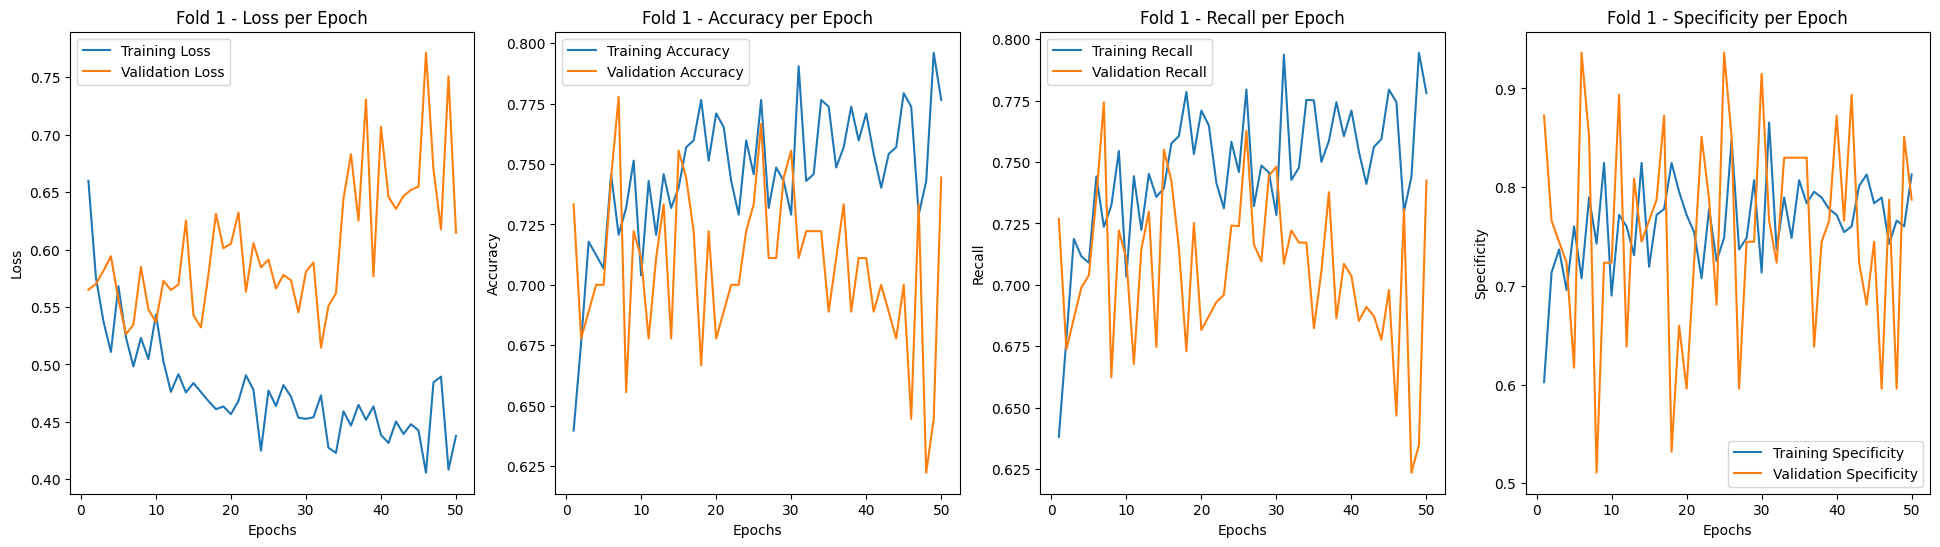

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.67, Accuracy: 0.64, Recall: 0.64, Specificity: 0.67, Validation Loss: 0.60, Validation Accuracy: 0.62, Validation Recall: 0.63, Validation Specificity: 0.43
Epoch 2/50, Loss: 0.56, Accuracy: 0.68, Recall: 0.68, Specificity: 0.67, Validation Loss: 0.59, Validation Accuracy: 0.64, Validation Recall: 0.64, Validation Specificity: 0.74
Epoch 3/50, Loss: 0.55, Accuracy: 0.69, Recall: 0.69, Specificity: 0.70, Validation Loss: 0.58, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.72
Epoch 4/50, Loss: 0.56, Accuracy: 0.73, Recall: 0.73, Specificity: 0.74, Validation Loss: 0.56, Validation Accuracy: 0.71, Validation Recall: 0.71, Validation Specificity: 0.79
Epoch 5/50, Loss: 0.54, Accuracy: 0.72, Recall: 0.72, Specificity: 0.71, Validation Loss: 0.56, Validation Accuracy: 0.70, Validation Recall: 0.69, Validation Specificity: 0.83
Epoch 6/50, Loss: 0.52, Accuracy: 0.71, Recall: 0.71, Specificity: 0.73, Validation Loss: 0.74, Validation Accuracy

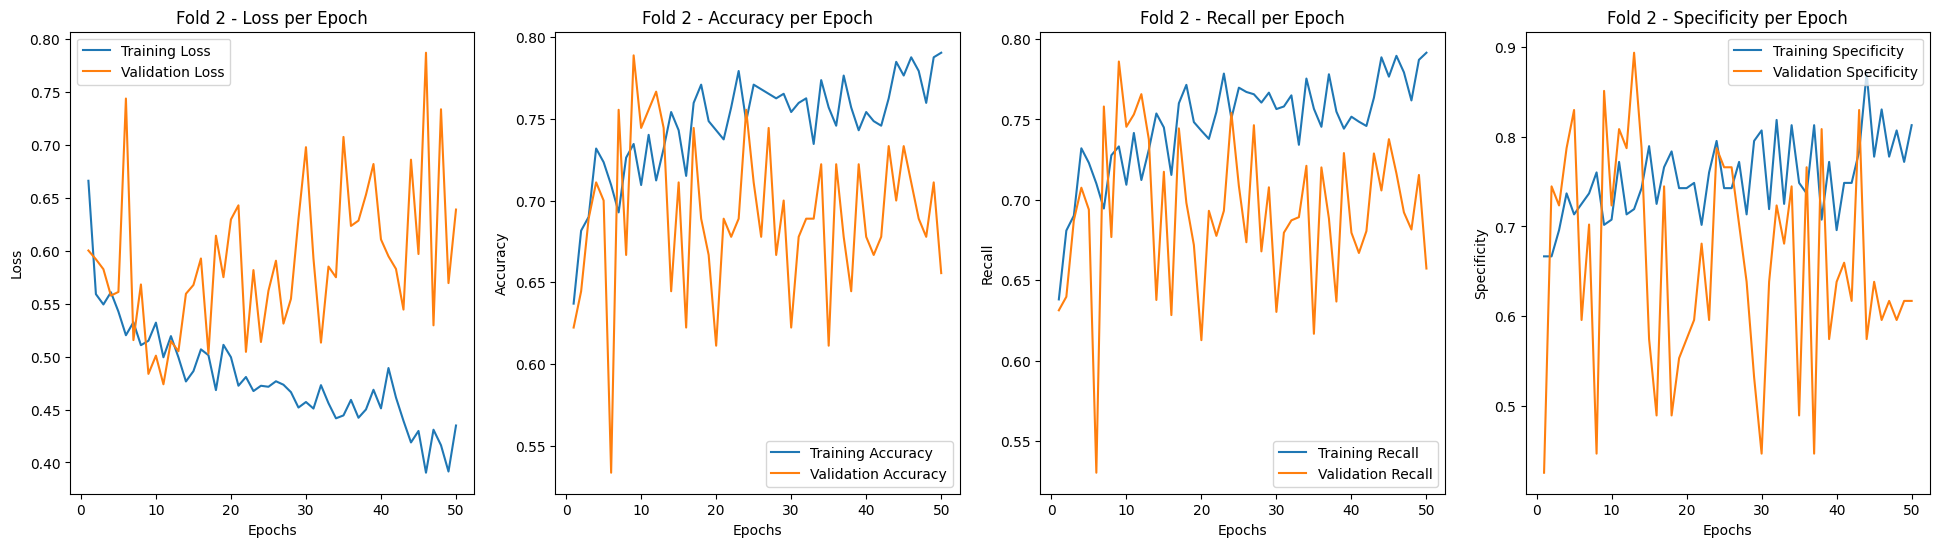

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.63, Accuracy: 0.65, Recall: 0.65, Specificity: 0.68, Validation Loss: 0.61, Validation Accuracy: 0.60, Validation Recall: 0.61, Validation Specificity: 0.69
Epoch 2/50, Loss: 0.56, Accuracy: 0.69, Recall: 0.69, Specificity: 0.66, Validation Loss: 0.56, Validation Accuracy: 0.69, Validation Recall: 0.70, Validation Specificity: 0.93
Epoch 3/50, Loss: 0.57, Accuracy: 0.72, Recall: 0.72, Specificity: 0.77, Validation Loss: 0.57, Validation Accuracy: 0.63, Validation Recall: 0.64, Validation Specificity: 0.74
Epoch 4/50, Loss: 0.53, Accuracy: 0.72, Recall: 0.72, Specificity: 0.76, Validation Loss: 0.60, Validation Accuracy: 0.67, Validation Recall: 0.67, Validation Specificity: 0.76
Epoch 5/50, Loss: 0.52, Accuracy: 0.73, Recall: 0.73, Specificity: 0.76, Validation Loss: 0.69, Validation Accuracy: 0.66, Validation Recall: 0.66, Validation Specificity: 0.76
Epoch 6/50, Loss: 0.53, Accuracy: 0.72, Recall: 0.72, Specificity: 0.72, Validation Loss: 0.58, Validation Accuracy

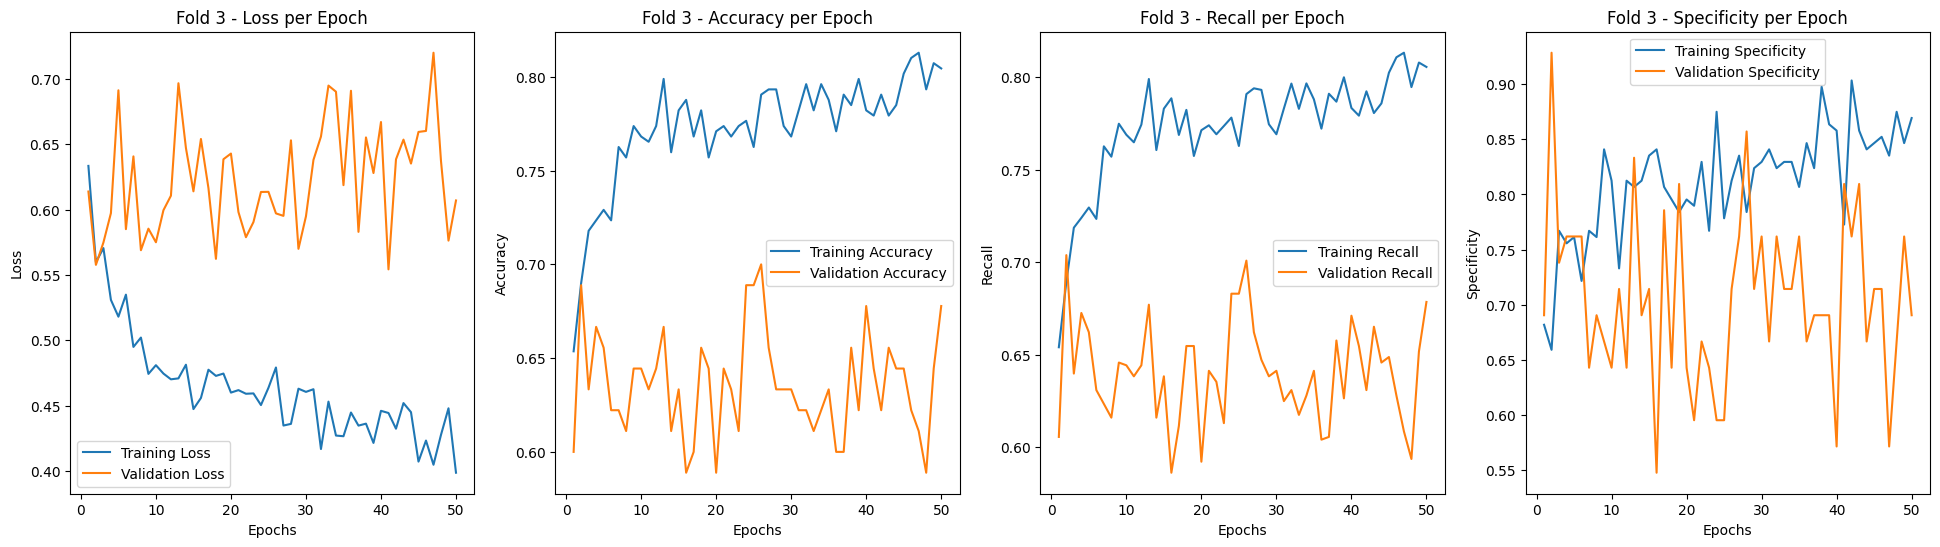

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.65, Accuracy: 0.65, Recall: 0.65, Specificity: 0.64, Validation Loss: 0.63, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.83
Epoch 2/50, Loss: 0.57, Accuracy: 0.68, Recall: 0.68, Specificity: 0.75, Validation Loss: 0.59, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.79
Epoch 3/50, Loss: 0.56, Accuracy: 0.69, Recall: 0.69, Specificity: 0.75, Validation Loss: 0.53, Validation Accuracy: 0.66, Validation Recall: 0.67, Validation Specificity: 0.74
Epoch 4/50, Loss: 0.53, Accuracy: 0.70, Recall: 0.70, Specificity: 0.72, Validation Loss: 0.56, Validation Accuracy: 0.64, Validation Recall: 0.65, Validation Specificity: 0.79
Epoch 5/50, Loss: 0.52, Accuracy: 0.72, Recall: 0.72, Specificity: 0.74, Validation Loss: 0.52, Validation Accuracy: 0.71, Validation Recall: 0.71, Validation Specificity: 0.79
Epoch 6/50, Loss: 0.49, Accuracy: 0.73, Recall: 0.73, Specificity: 0.76, Validation Loss: 0.57, Validation Accuracy

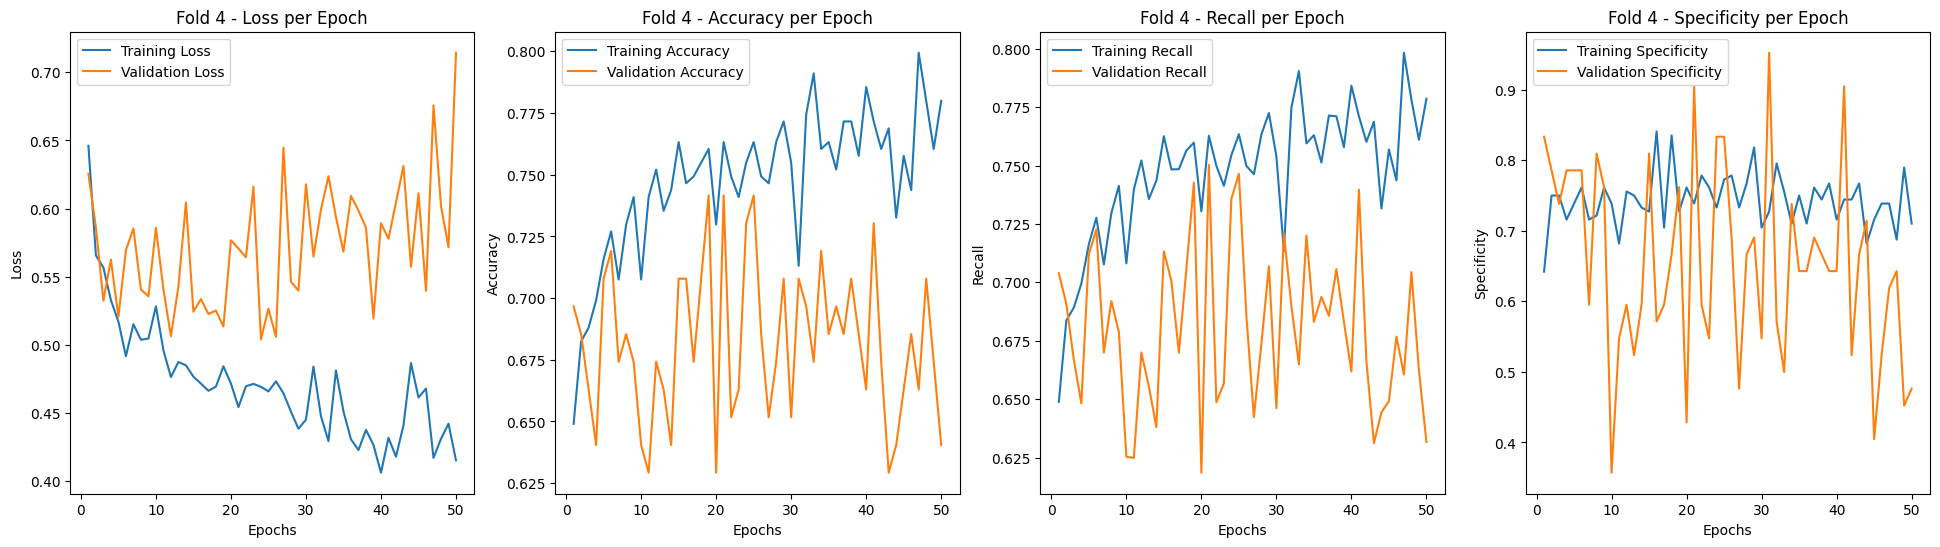

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.65, Accuracy: 0.65, Recall: 0.65, Specificity: 0.71, Validation Loss: 0.60, Validation Accuracy: 0.63, Validation Recall: 0.59, Validation Specificity: 0.23
Epoch 2/50, Loss: 0.58, Accuracy: 0.71, Recall: 0.71, Specificity: 0.73, Validation Loss: 0.54, Validation Accuracy: 0.70, Validation Recall: 0.71, Validation Specificity: 0.85
Epoch 3/50, Loss: 0.55, Accuracy: 0.67, Recall: 0.67, Specificity: 0.75, Validation Loss: 0.57, Validation Accuracy: 0.73, Validation Recall: 0.71, Validation Specificity: 0.55
Epoch 4/50, Loss: 0.53, Accuracy: 0.70, Recall: 0.71, Specificity: 0.76, Validation Loss: 0.54, Validation Accuracy: 0.65, Validation Recall: 0.66, Validation Specificity: 0.72
Epoch 5/50, Loss: 0.54, Accuracy: 0.71, Recall: 0.71, Specificity: 0.78, Validation Loss: 0.60, Validation Accuracy: 0.69, Validation Recall: 0.68, Validation Specificity: 0.57
Epoch 6/50, Loss: 0.52, Accuracy: 0.70, Recall: 0.70, Specificity: 0.77, Validation Loss: 0.60, Validation Accuracy

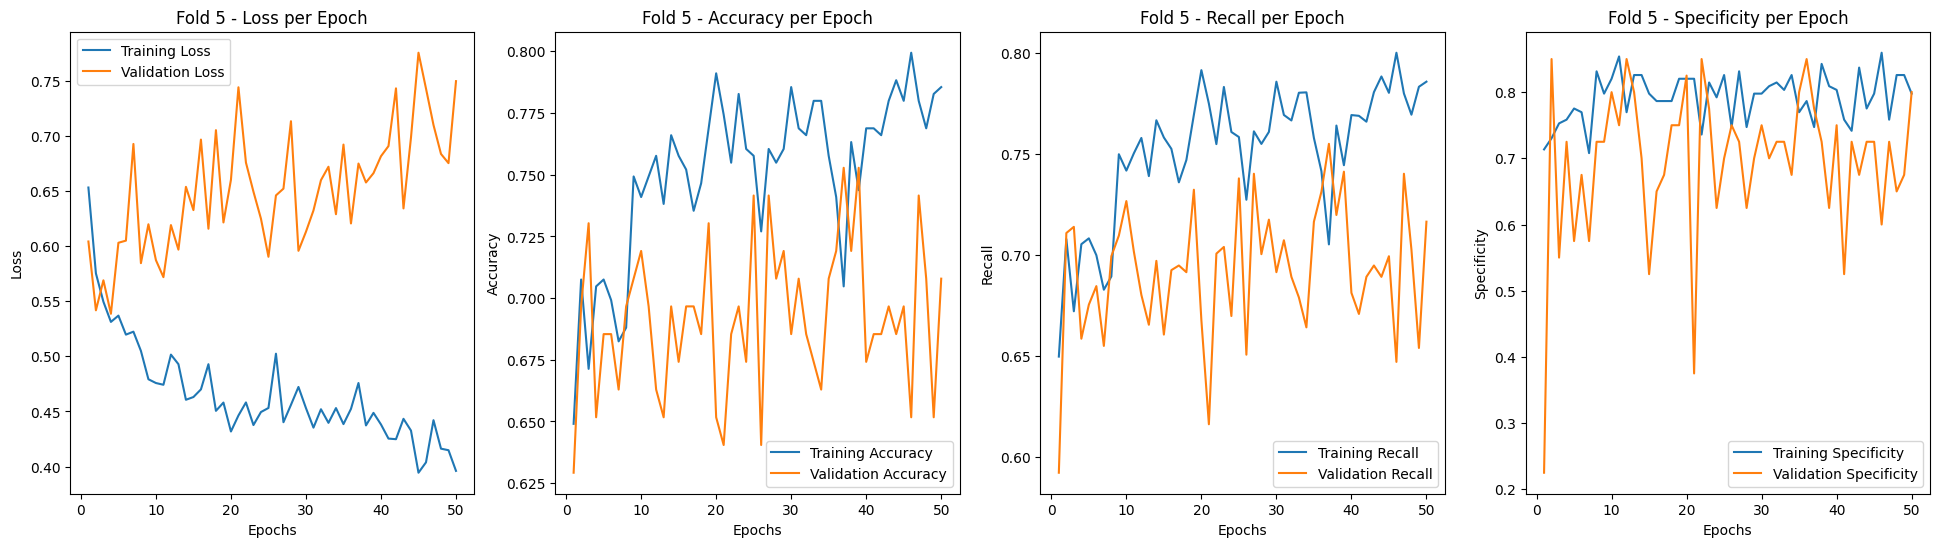

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.44 - Train Accuracy: 0.78 - Train Recall: 0.78 - Train Specificity: 0.81
           - Validation Loss: 0.61 - Validation Accuracy: 0.74 - Validation Recall: 0.74 - Validation Specificity: 0.79
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.43 - Train Accuracy: 0.79 - Train Recall: 0.79 - Train Specificity: 0.81
           - Validation Loss: 0.64 - Validation Accuracy: 0.66 - Validation Recall: 0.66 - Validation Specificity: 0.62
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.40 - Train Accuracy: 0.80 - Train Recall: 0.81 - Train Specificity: 0.87
           - Validation Loss: 0.61 - Validation Accuracy: 0.68 - Validation Recall: 0.68 - Validation Specificity: 0.69
---------------------------------------

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('spectral_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=8, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=8, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')
        
        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []
        
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

        # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')
        

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'spectral_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [90]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'spectral_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\773896332.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.74      0.79      0.76        47
      Normal       0.75      0.70      0.72        43

    accuracy                           0.74        90
   macro avg       0.74      0.74      0.74        90
weighted avg       0.74      0.74      0.74        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.69      0.62      0.65        47
      Normal       0.62      0.70      0.66        43

    accuracy                           0.66        90
   macro avg       0.66      0.66      0.66        90
weighted avg       0.66      0.66      0.66        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\773896332.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.64      0.69      0.67        42
      Normal       0.71      0.67      0.69        48

    accuracy                           0.68        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.68      0.68      0.68        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.67      0.48      0.56        42
      Normal       0.63      0.79      0.70        47

    accuracy                           0.64        89
   macro avg       0.65      0.63      0.63        89
weighted avg       0.65      0.64      0.63        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.64      0

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\773896332.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

In [91]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'spectral_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\598228904.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Metrics for Fold 1
Accuracy: 0.7444
Precision: 0.7450
F1-Score: 0.7429
Sensitivity (Recall for MI): 0.6977
Specificity (True Negative Rate): 0.7872
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.6556
Precision: 0.6577
F1-Score: 0.6555
Sensitivity (Recall for MI): 0.6977
Specificity (True Negative Rate): 0.6170
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\598228904.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Metrics for Fold 3
Accuracy: 0.6778
Precision: 0.6778
F1-Score: 0.6774
Sensitivity (Recall for MI): 0.6667
Specificity (True Negative Rate): 0.6905
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.6404
Precision: 0.6469
F1-Score: 0.6268
Sensitivity (Recall for MI): 0.7872
Specificity (True Negative Rate): 0.4762
--------------------------------------------------------------------------------
Metrics for Fold 5
Accuracy: 0.7079
Precision: 0.7174
F1-Score: 0.7078
Sensitivity (Recall for MI): 0.6327
Specificity (True Negative Rate): 0.8000
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\598228904.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\634219257.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

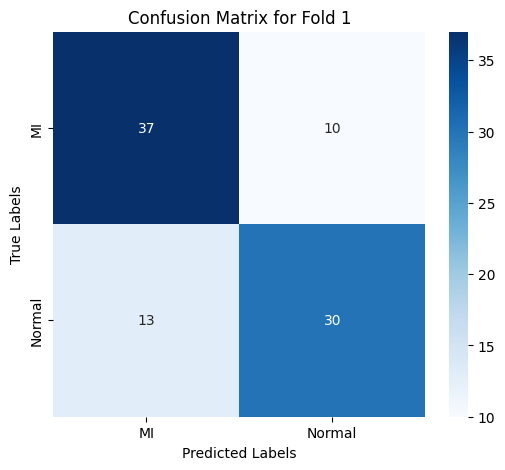

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\634219257.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

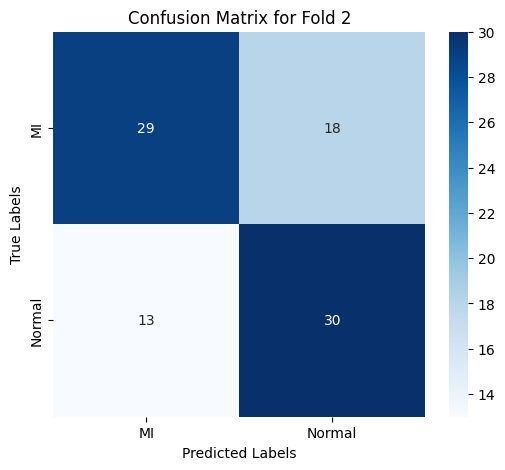

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\634219257.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

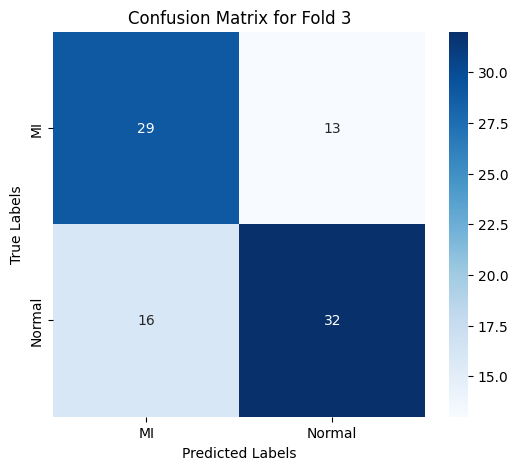

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\634219257.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

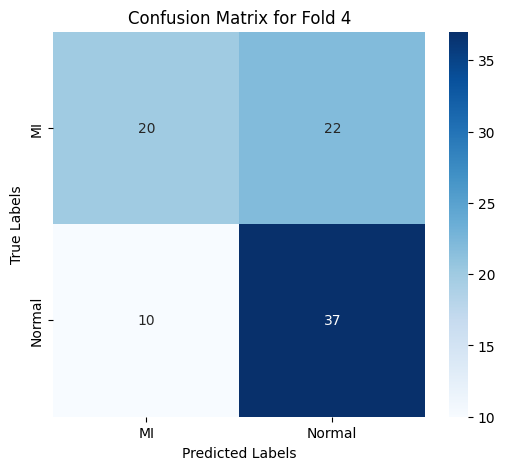

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\634219257.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

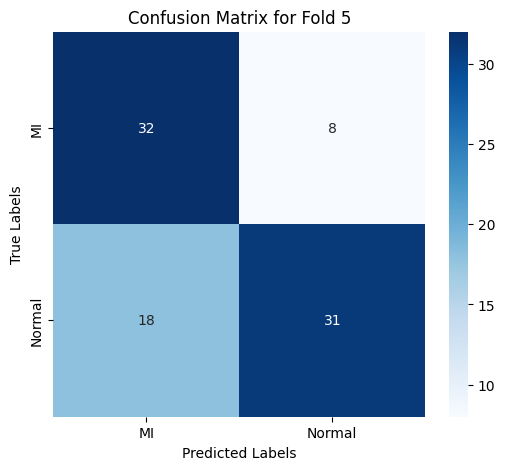

--------------------------------------------------------------------------------


In [92]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'spectral_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## Temporal with Transformer Encoder

In [93]:
selected_columns = ['Entropy', 'Wavelet Means', 'Wavelet std', 'Wavelet max', 'Wavelet min', 'Med_wavelet', 'Var_wavelet', 'Skew_wavelet', 'Q1_wavelet', 'Q3_wavelet', 'IQR_wavelet', 'MinMax_wavelet', 'Kurt_wavelet', 'Label']
# Membuat dataframe baru dengan kolom pilihan
df_temporal = df_combine_scaled[selected_columns]

# Menampilkan dataframe baru
print(df_temporal.head())

    Entropy  Wavelet Means  Wavelet std  Wavelet max  Wavelet min  \
0  0.063608      -1.137174    -0.430682     0.024031     0.004692   
1  0.064888      -0.388901    -0.565070    -0.549047     0.441349   
2  0.063367       0.180394    -0.112938    -0.376300     0.355416   
3  0.068559       0.408853     1.567008     1.825143    -0.973889   
4  0.062193      -0.404628    -0.506024    -0.423697     0.363664   

   Med_wavelet  Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0    -0.889833    -0.218548      1.146071   -0.076698    0.026616   
1    -0.241600    -0.239203     -0.594643    0.178925   -0.172615   
2     1.042363    -0.151908     -0.491310   -0.838081    0.944422   
3     0.205136     0.616326      2.953232   -0.848416    0.973499   
4     0.454240    -0.230679     -0.101673   -0.313961    0.340572   

   IQR_wavelet  MinMax_wavelet  Kurt_wavelet Label  
0     0.051833        0.226780      1.470453    MI  
1    -0.176615       -0.536473     -0.367429    MI  
2     0.895

In [94]:
X = df_temporal.drop('Label', axis=1).values
y = df_temporal['Label'].values

In [95]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.74, Accuracy: 0.57, Recall: 0.57, Specificity: 0.54, Validation Loss: 0.63, Validation Accuracy: 0.64, Validation Recall: 0.64, Validation Specificity: 0.81
Epoch 2/50, Loss: 0.58, Accuracy: 0.70, Recall: 0.71, Specificity: 0.75, Validation Loss: 0.54, Validation Accuracy: 0.70, Validation Recall: 0.69, Validation Specificity: 0.81
Epoch 3/50, Loss: 0.54, Accuracy: 0.72, Recall: 0.72, Specificity: 0.74, Validation Loss: 0.48, Validation Accuracy: 0.76, Validation Recall: 0.75, Validation Specificity: 0.89
Epoch 4/50, Loss: 0.43, Accuracy: 0.78, Recall: 0.78, Specificity: 0.83, Validation Loss: 0.60, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.66
Epoch 5/50, Loss: 0.43, Accuracy: 0.78, Recall: 0.78, Specificity: 0.82, Validation Loss: 0.42, Validation Accuracy: 0.84, Validation Recall: 0.84, Validation Specificity: 0.94
Epoch 6/50, Loss: 0.34, Accuracy: 0.85, Recall: 0.85, Specificity: 0.92, Validation Loss: 0.29, Validation Accuracy

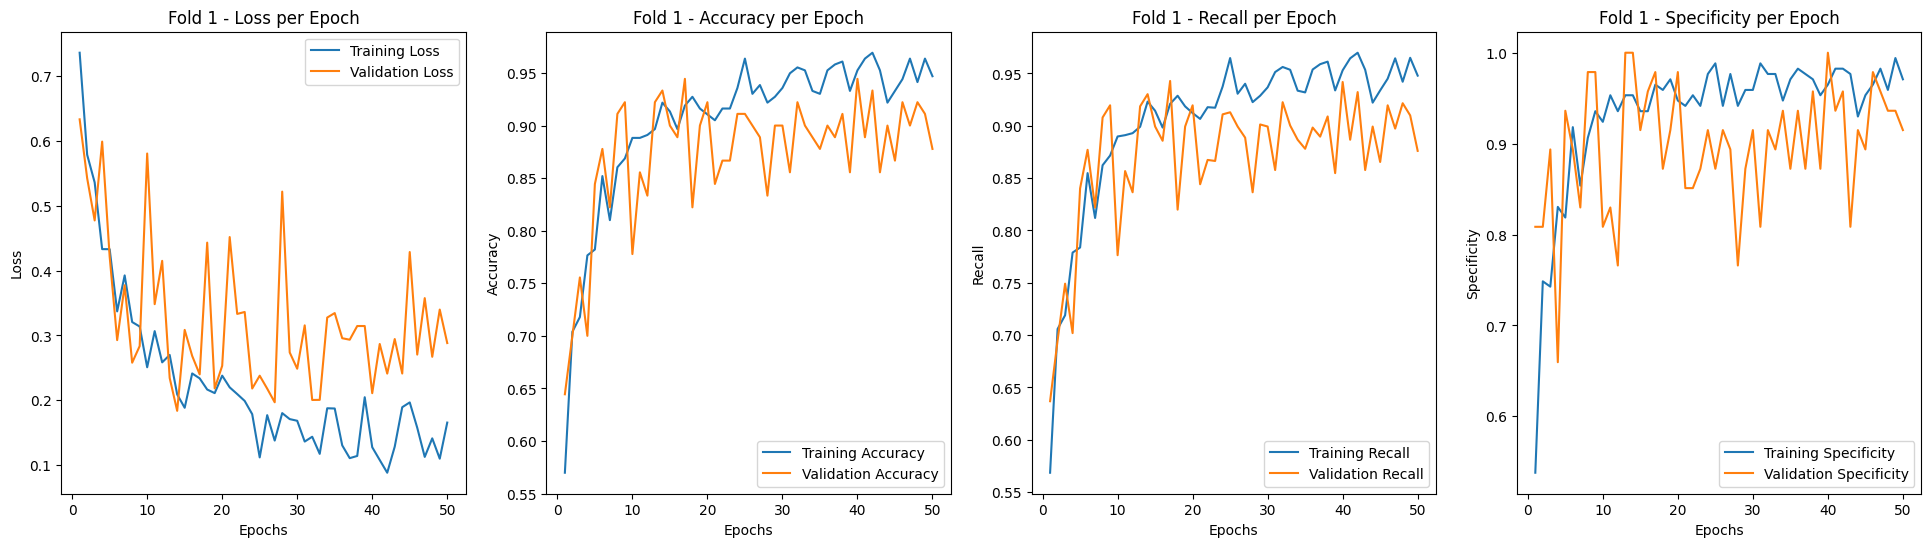

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.72, Accuracy: 0.56, Recall: 0.56, Specificity: 0.54, Validation Loss: 0.65, Validation Accuracy: 0.58, Validation Recall: 0.58, Validation Specificity: 0.57
Epoch 2/50, Loss: 0.60, Accuracy: 0.61, Recall: 0.61, Specificity: 0.60, Validation Loss: 0.50, Validation Accuracy: 0.79, Validation Recall: 0.78, Validation Specificity: 0.91
Epoch 3/50, Loss: 0.52, Accuracy: 0.73, Recall: 0.73, Specificity: 0.80, Validation Loss: 0.46, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.87
Epoch 4/50, Loss: 0.45, Accuracy: 0.78, Recall: 0.79, Specificity: 0.81, Validation Loss: 0.61, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.60
Epoch 5/50, Loss: 0.34, Accuracy: 0.85, Recall: 0.85, Specificity: 0.87, Validation Loss: 0.35, Validation Accuracy: 0.84, Validation Recall: 0.84, Validation Specificity: 0.89
Epoch 6/50, Loss: 0.36, Accuracy: 0.82, Recall: 0.82, Specificity: 0.87, Validation Loss: 0.41, Validation Accuracy

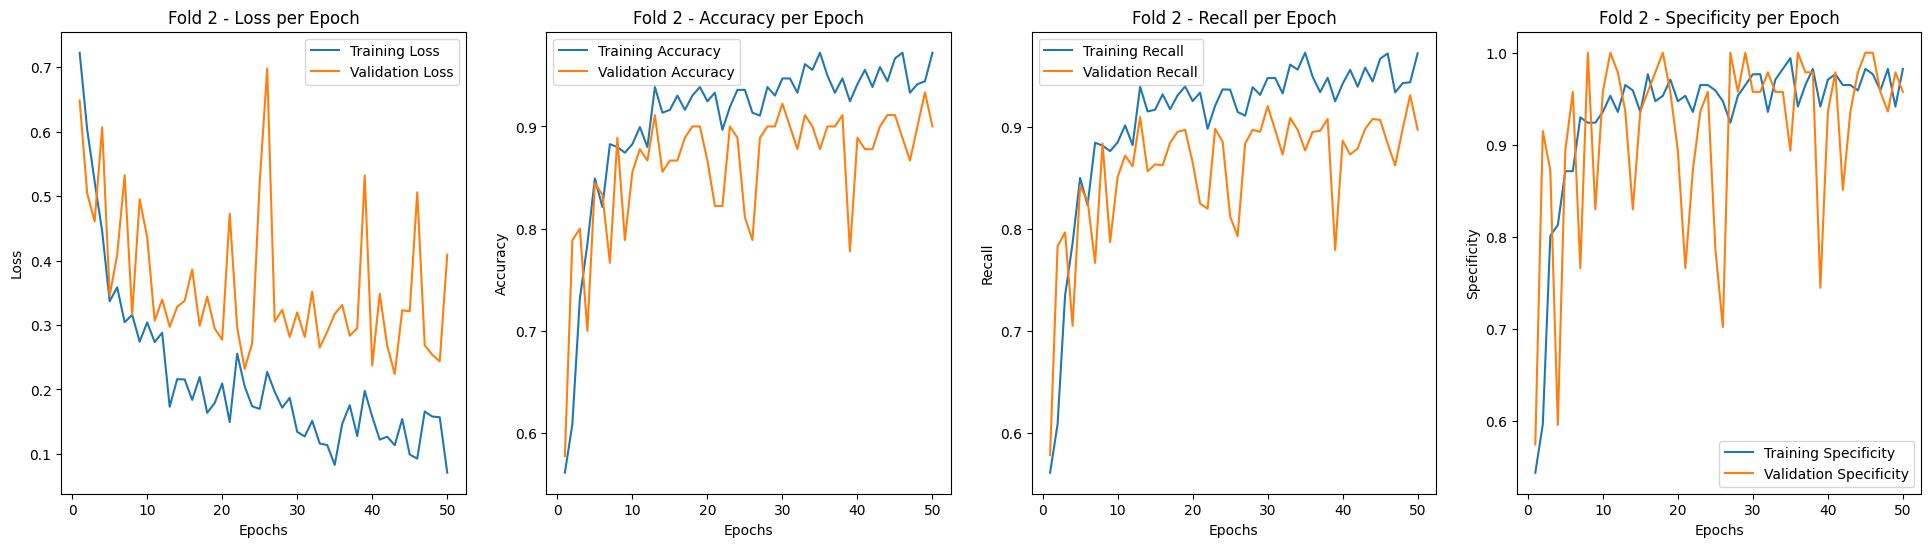

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.76, Accuracy: 0.58, Recall: 0.58, Specificity: 0.55, Validation Loss: 0.67, Validation Accuracy: 0.54, Validation Recall: 0.54, Validation Specificity: 0.48
Epoch 2/50, Loss: 0.62, Accuracy: 0.62, Recall: 0.62, Specificity: 0.63, Validation Loss: 0.62, Validation Accuracy: 0.60, Validation Recall: 0.59, Validation Specificity: 0.40
Epoch 3/50, Loss: 0.58, Accuracy: 0.67, Recall: 0.67, Specificity: 0.66, Validation Loss: 0.52, Validation Accuracy: 0.74, Validation Recall: 0.75, Validation Specificity: 0.76
Epoch 4/50, Loss: 0.54, Accuracy: 0.71, Recall: 0.71, Specificity: 0.77, Validation Loss: 0.60, Validation Accuracy: 0.61, Validation Recall: 0.61, Validation Specificity: 0.55
Epoch 5/50, Loss: 0.44, Accuracy: 0.77, Recall: 0.77, Specificity: 0.80, Validation Loss: 0.52, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.79
Epoch 6/50, Loss: 0.52, Accuracy: 0.75, Recall: 0.76, Specificity: 0.84, Validation Loss: 0.37, Validation Accuracy

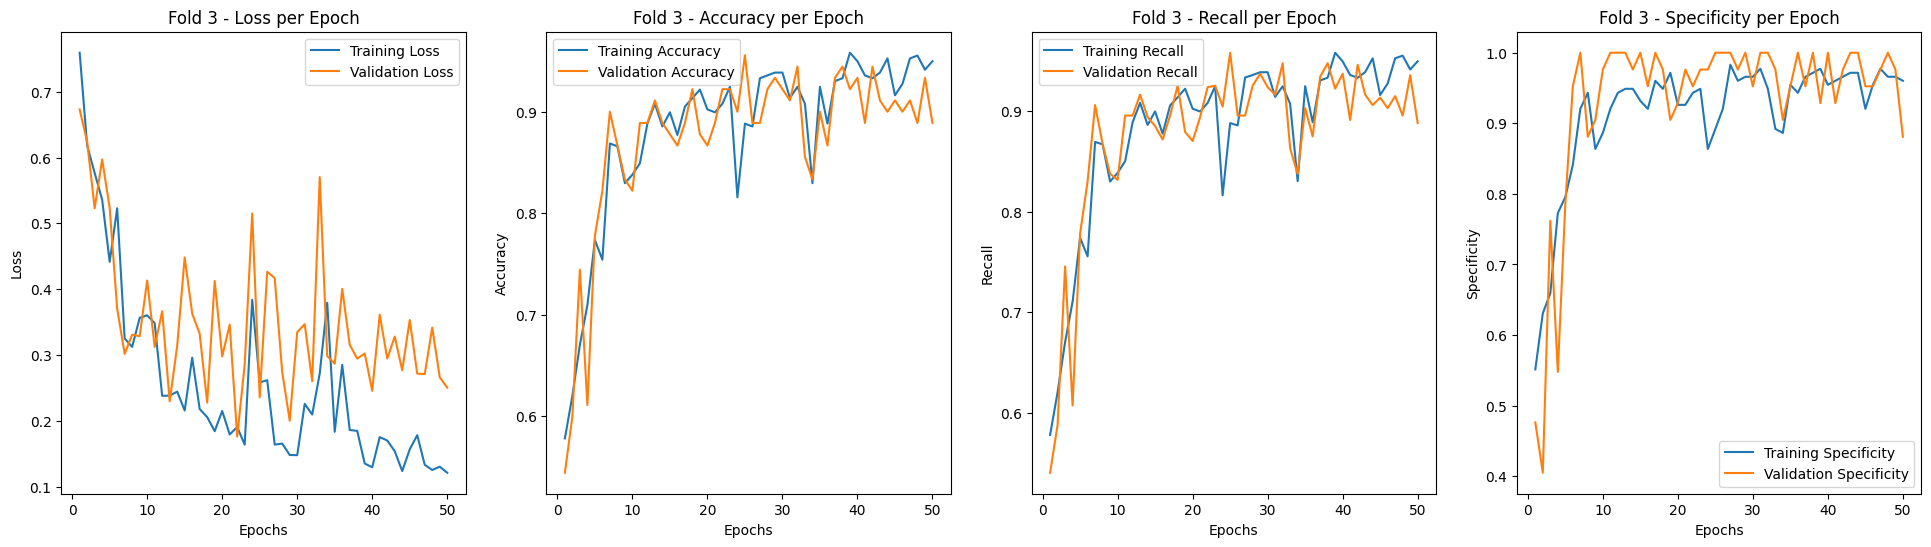

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.71, Accuracy: 0.58, Recall: 0.58, Specificity: 0.60, Validation Loss: 0.89, Validation Accuracy: 0.45, Validation Recall: 0.45, Validation Specificity: 0.43
Epoch 2/50, Loss: 0.64, Accuracy: 0.64, Recall: 0.64, Specificity: 0.66, Validation Loss: 0.65, Validation Accuracy: 0.63, Validation Recall: 0.65, Validation Specificity: 0.95
Epoch 3/50, Loss: 0.57, Accuracy: 0.68, Recall: 0.68, Specificity: 0.76, Validation Loss: 0.55, Validation Accuracy: 0.72, Validation Recall: 0.73, Validation Specificity: 0.90
Epoch 4/50, Loss: 0.48, Accuracy: 0.76, Recall: 0.76, Specificity: 0.81, Validation Loss: 0.51, Validation Accuracy: 0.73, Validation Recall: 0.74, Validation Specificity: 0.83
Epoch 5/50, Loss: 0.50, Accuracy: 0.78, Recall: 0.78, Specificity: 0.88, Validation Loss: 0.40, Validation Accuracy: 0.82, Validation Recall: 0.83, Validation Specificity: 0.93
Epoch 6/50, Loss: 0.34, Accuracy: 0.86, Recall: 0.86, Specificity: 0.93, Validation Loss: 0.35, Validation Accuracy

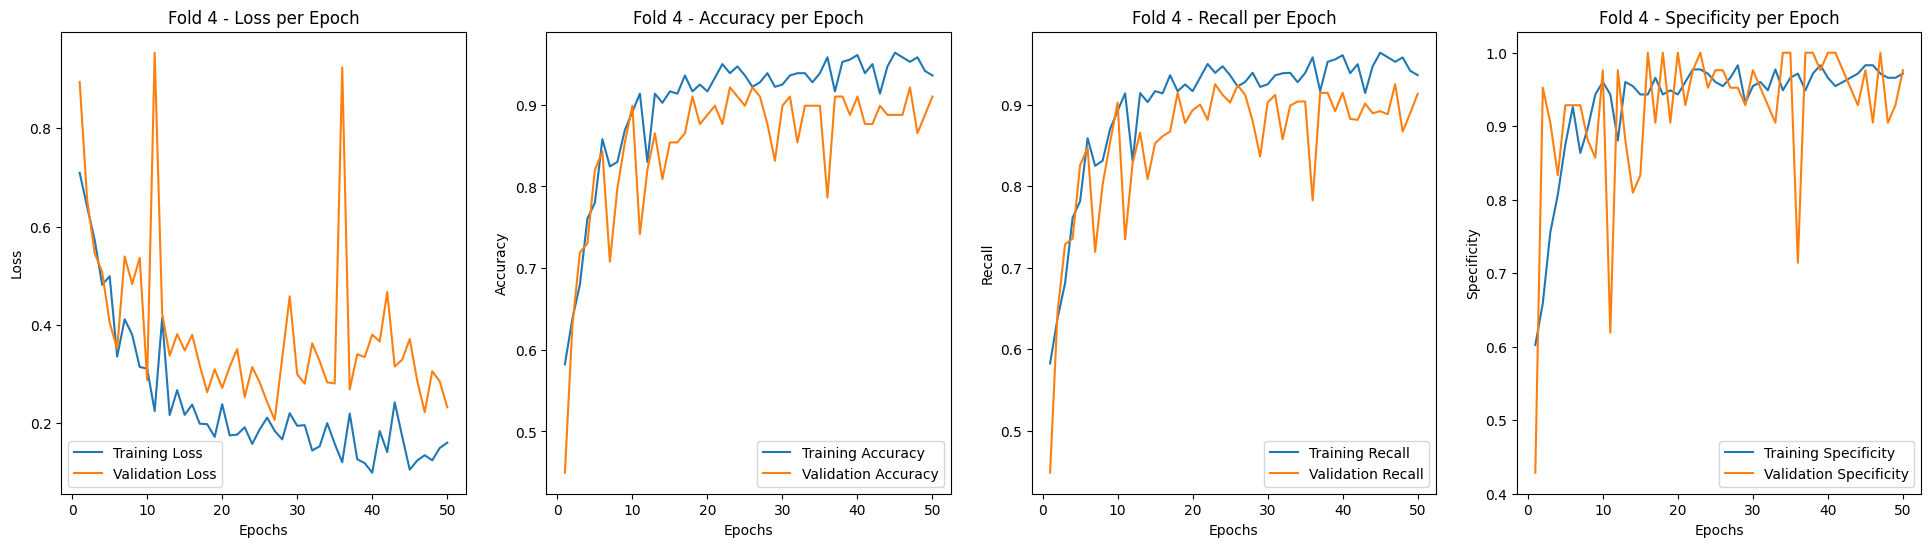

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.74, Accuracy: 0.56, Recall: 0.56, Specificity: 0.54, Validation Loss: 0.71, Validation Accuracy: 0.63, Validation Recall: 0.64, Validation Specificity: 0.72
Epoch 2/50, Loss: 0.62, Accuracy: 0.65, Recall: 0.65, Specificity: 0.69, Validation Loss: 0.53, Validation Accuracy: 0.67, Validation Recall: 0.68, Validation Specificity: 0.72
Epoch 3/50, Loss: 0.50, Accuracy: 0.76, Recall: 0.76, Specificity: 0.79, Validation Loss: 0.54, Validation Accuracy: 0.76, Validation Recall: 0.78, Validation Specificity: 0.90
Epoch 4/50, Loss: 0.42, Accuracy: 0.79, Recall: 0.79, Specificity: 0.85, Validation Loss: 0.36, Validation Accuracy: 0.82, Validation Recall: 0.83, Validation Specificity: 0.97
Epoch 5/50, Loss: 0.33, Accuracy: 0.86, Recall: 0.86, Specificity: 0.93, Validation Loss: 0.59, Validation Accuracy: 0.71, Validation Recall: 0.69, Validation Specificity: 0.53
Epoch 6/50, Loss: 0.42, Accuracy: 0.79, Recall: 0.79, Specificity: 0.83, Validation Loss: 0.36, Validation Accuracy

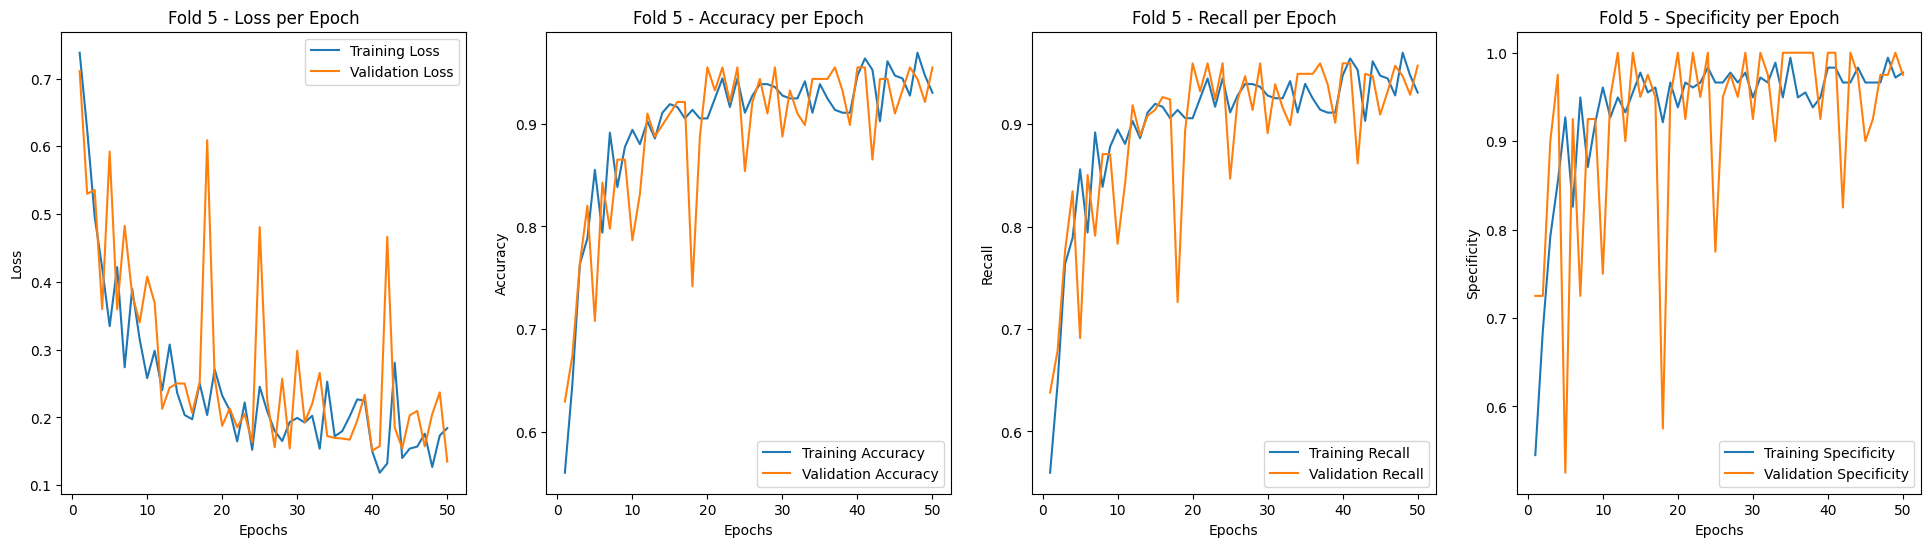

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.17 - Train Accuracy: 0.95 - Train Recall: 0.95 - Train Specificity: 0.97
           - Validation Loss: 0.29 - Validation Accuracy: 0.88 - Validation Recall: 0.88 - Validation Specificity: 0.91
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.07 - Train Accuracy: 0.97 - Train Recall: 0.97 - Train Specificity: 0.98
           - Validation Loss: 0.41 - Validation Accuracy: 0.90 - Validation Recall: 0.90 - Validation Specificity: 0.96
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.12 - Train Accuracy: 0.95 - Train Recall: 0.95 - Train Specificity: 0.96
           - Validation Loss: 0.25 - Validation Accuracy: 0.89 - Validation Recall: 0.89 - Validation Specificity: 0.88
---------------------------------------

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('temporal_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=8, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=8, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())


        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')

        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

        # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1


# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [99]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3922957936.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.86      0.91      0.89        47
      Normal       0.90      0.84      0.87        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.87      0.96      0.91        47
      Normal       0.95      0.84      0.89        43

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3922957936.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.88      0.88      0.88        42
      Normal       0.90      0.90      0.90        48

    accuracy                           0.89        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.89      0.89      0.89        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.85      0.98      0.91        42
      Normal       0.98      0.85      0.91        47

    accuracy                           0.91        89
   macro avg       0.91      0.91      0.91        89
weighted avg       0.92      0.91      0.91        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.93      0

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3922957936.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

In [100]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2730751564.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 1
Accuracy: 0.8778
Precision: 0.8800
F1-Score: 0.8770
Sensitivity (Recall for MI): 0.8372
Specificity (True Negative Rate): 0.9149
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.9000
Precision: 0.9064
F1-Score: 0.8990
Sensitivity (Recall for MI): 0.8372
Specificity (True Negative Rate): 0.9574
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2730751564.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 3
Accuracy: 0.8889
Precision: 0.8884
F1-Score: 0.8884
Sensitivity (Recall for MI): 0.8958
Specificity (True Negative Rate): 0.8810
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.9101
Precision: 0.9149
F1-Score: 0.9101
Sensitivity (Recall for MI): 0.8511
Specificity (True Negative Rate): 0.9762
--------------------------------------------------------------------------------
Metrics for Fold 5
Accuracy: 0.9551
Precision: 0.9536
F1-Score: 0.9548
Sensitivity (Recall for MI): 0.9388
Specificity (True Negative Rate): 0.9750
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2730751564.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\899154088.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

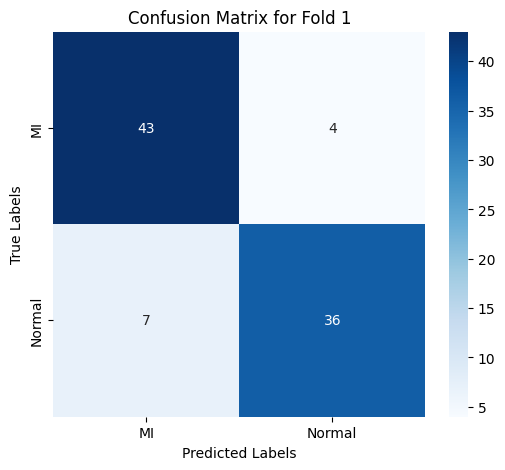

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\899154088.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

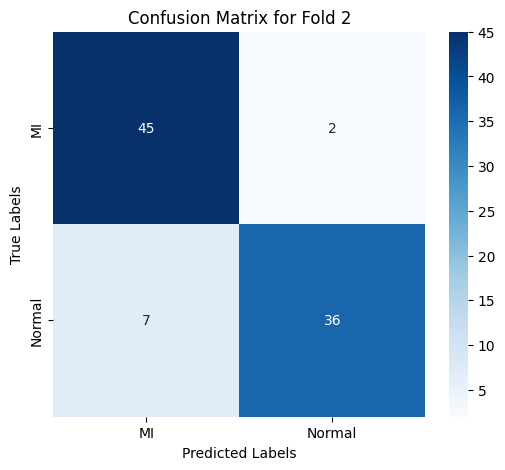

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\899154088.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

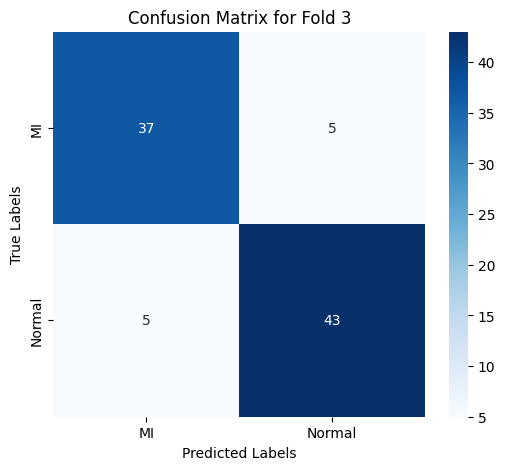

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\899154088.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

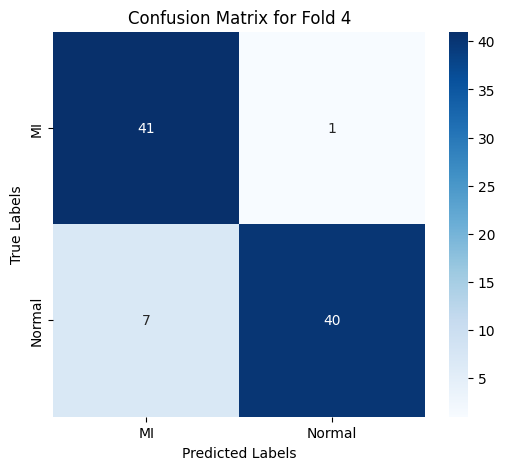

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\899154088.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

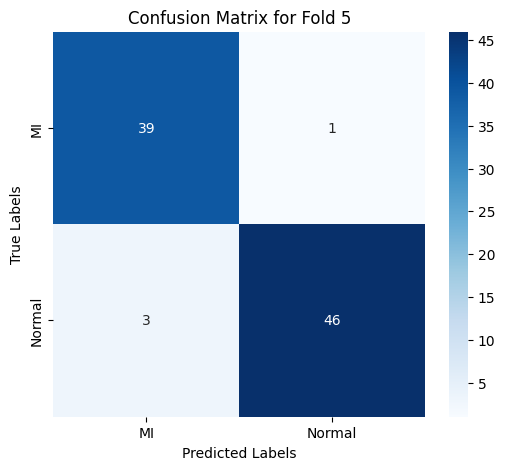

--------------------------------------------------------------------------------


In [101]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## Multi Scale with Transformer Encoder

In [102]:
X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values

In [103]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.65, Accuracy: 0.66, Recall: 0.66, Specificity: 0.67, Validation Loss: 0.51, Validation Accuracy: 0.77, Validation Recall: 0.76, Validation Specificity: 0.83
Epoch 2/50, Loss: 0.49, Accuracy: 0.76, Recall: 0.76, Specificity: 0.75, Validation Loss: 0.40, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.81
Epoch 3/50, Loss: 0.42, Accuracy: 0.82, Recall: 0.82, Specificity: 0.85, Validation Loss: 0.50, Validation Accuracy: 0.78, Validation Recall: 0.77, Validation Specificity: 0.89
Epoch 4/50, Loss: 0.35, Accuracy: 0.84, Recall: 0.84, Specificity: 0.86, Validation Loss: 0.47, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.83
Epoch 5/50, Loss: 0.29, Accuracy: 0.88, Recall: 0.88, Specificity: 0.91, Validation Loss: 0.56, Validation Accuracy: 0.77, Validation Recall: 0.77, Validation Specificity: 0.72
Epoch 6/50, Loss: 0.27, Accuracy: 0.86, Recall: 0.86, Specificity: 0.84, Validation Loss: 0.46, Validation Accuracy

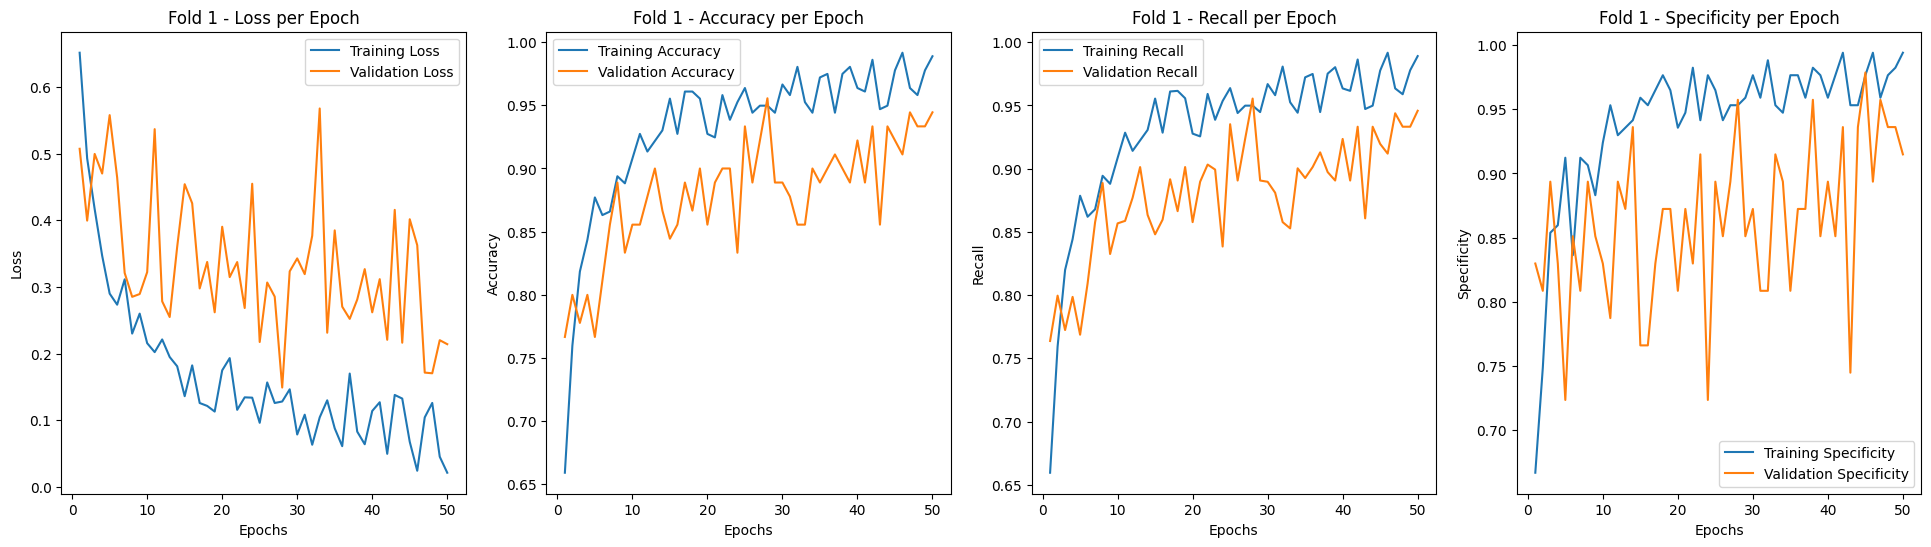

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.68, Accuracy: 0.62, Recall: 0.62, Specificity: 0.61, Validation Loss: 0.58, Validation Accuracy: 0.71, Validation Recall: 0.71, Validation Specificity: 0.77
Epoch 2/50, Loss: 0.48, Accuracy: 0.77, Recall: 0.77, Specificity: 0.77, Validation Loss: 0.40, Validation Accuracy: 0.82, Validation Recall: 0.82, Validation Specificity: 0.81
Epoch 3/50, Loss: 0.36, Accuracy: 0.85, Recall: 0.85, Specificity: 0.87, Validation Loss: 0.29, Validation Accuracy: 0.89, Validation Recall: 0.89, Validation Specificity: 0.85
Epoch 4/50, Loss: 0.37, Accuracy: 0.84, Recall: 0.84, Specificity: 0.87, Validation Loss: 0.45, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.66
Epoch 5/50, Loss: 0.30, Accuracy: 0.87, Recall: 0.87, Specificity: 0.91, Validation Loss: 0.33, Validation Accuracy: 0.86, Validation Recall: 0.85, Validation Specificity: 0.94
Epoch 6/50, Loss: 0.28, Accuracy: 0.89, Recall: 0.89, Specificity: 0.92, Validation Loss: 0.26, Validation Accuracy

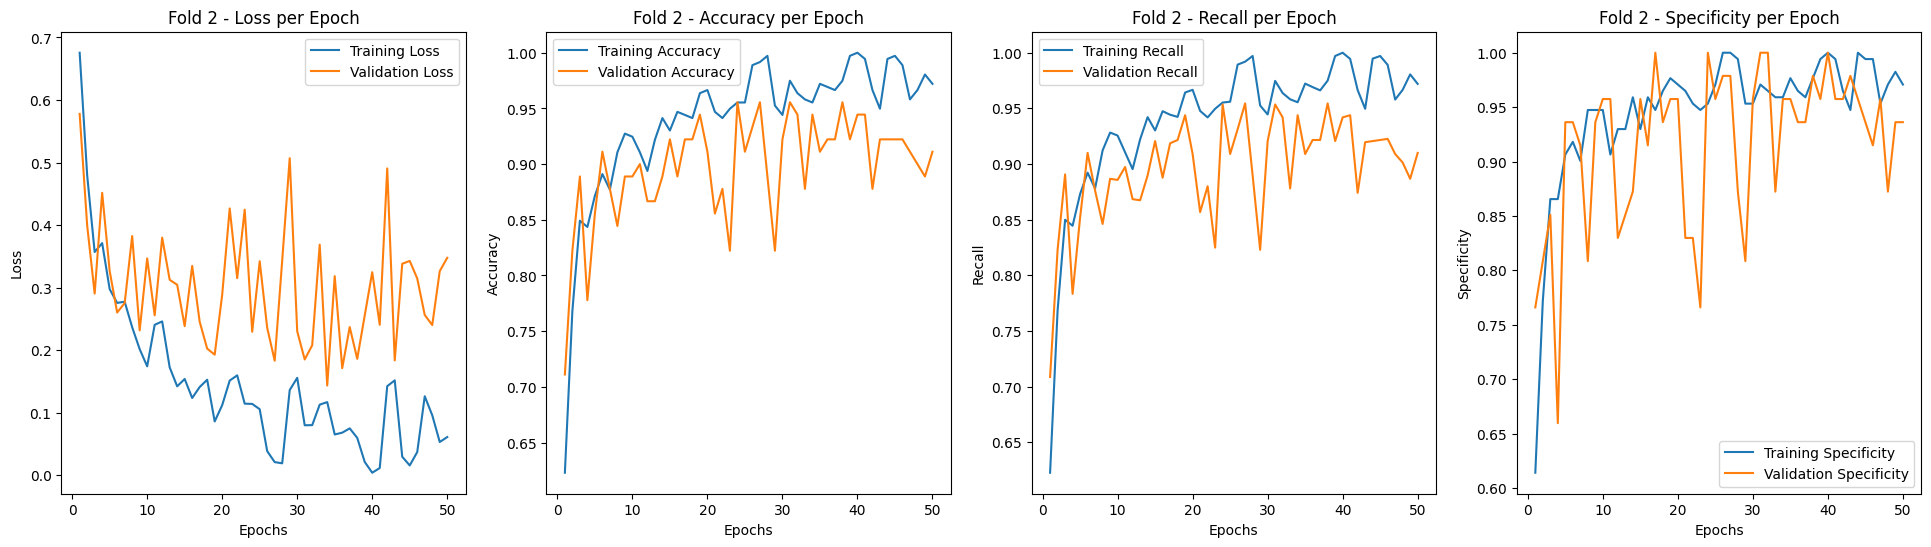

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.62, Accuracy: 0.68, Recall: 0.68, Specificity: 0.70, Validation Loss: 0.53, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.64
Epoch 2/50, Loss: 0.48, Accuracy: 0.77, Recall: 0.77, Specificity: 0.77, Validation Loss: 0.56, Validation Accuracy: 0.71, Validation Recall: 0.71, Validation Specificity: 0.76
Epoch 3/50, Loss: 0.35, Accuracy: 0.85, Recall: 0.85, Specificity: 0.86, Validation Loss: 0.37, Validation Accuracy: 0.80, Validation Recall: 0.81, Validation Specificity: 0.88
Epoch 4/50, Loss: 0.33, Accuracy: 0.87, Recall: 0.87, Specificity: 0.89, Validation Loss: 0.50, Validation Accuracy: 0.82, Validation Recall: 0.83, Validation Specificity: 0.93
Epoch 5/50, Loss: 0.30, Accuracy: 0.87, Recall: 0.87, Specificity: 0.88, Validation Loss: 0.33, Validation Accuracy: 0.86, Validation Recall: 0.86, Validation Specificity: 0.98
Epoch 6/50, Loss: 0.22, Accuracy: 0.91, Recall: 0.91, Specificity: 0.93, Validation Loss: 0.41, Validation Accuracy

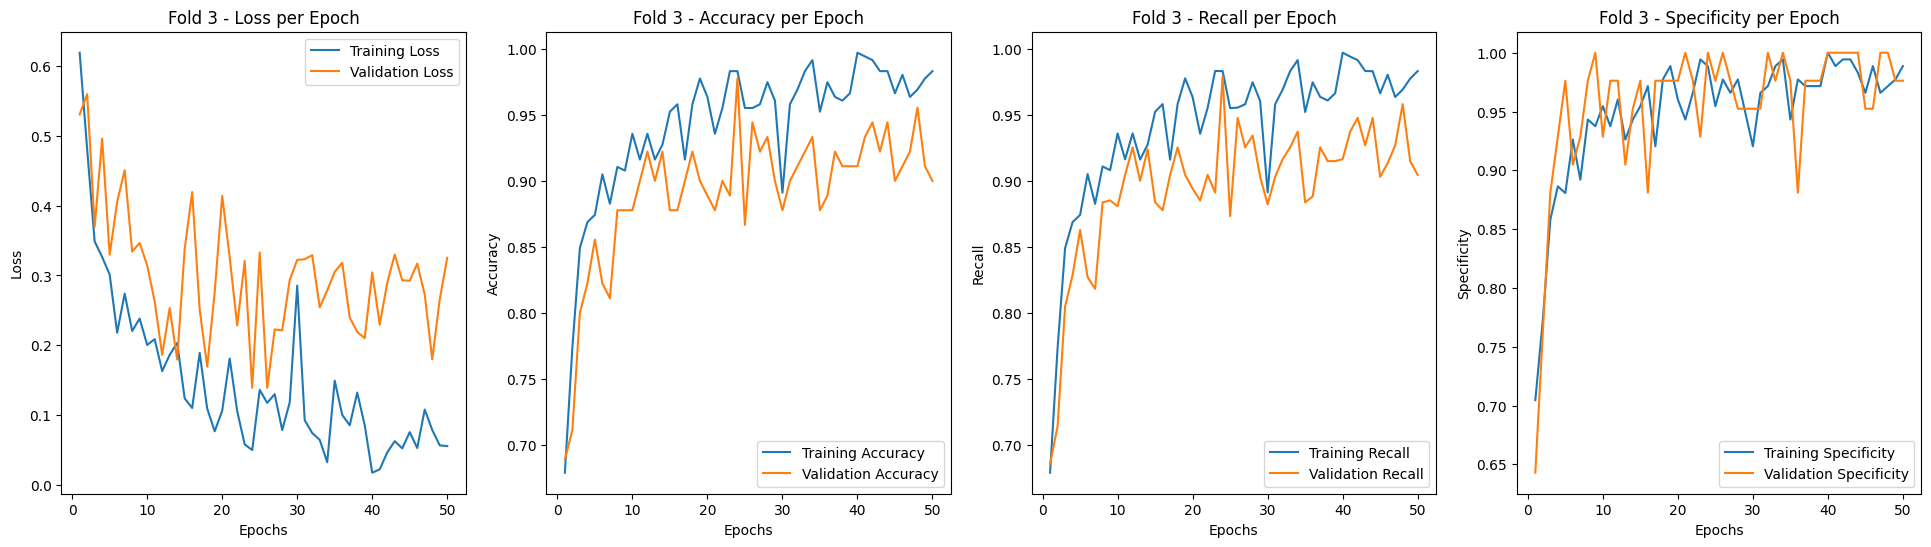

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.67, Accuracy: 0.61, Recall: 0.61, Specificity: 0.61, Validation Loss: 0.60, Validation Accuracy: 0.57, Validation Recall: 0.57, Validation Specificity: 0.45
Epoch 2/50, Loss: 0.49, Accuracy: 0.76, Recall: 0.76, Specificity: 0.77, Validation Loss: 0.54, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.81
Epoch 3/50, Loss: 0.38, Accuracy: 0.81, Recall: 0.81, Specificity: 0.83, Validation Loss: 0.42, Validation Accuracy: 0.84, Validation Recall: 0.85, Validation Specificity: 0.90
Epoch 4/50, Loss: 0.35, Accuracy: 0.85, Recall: 0.85, Specificity: 0.88, Validation Loss: 1.01, Validation Accuracy: 0.71, Validation Recall: 0.70, Validation Specificity: 0.48
Epoch 5/50, Loss: 0.36, Accuracy: 0.85, Recall: 0.85, Specificity: 0.84, Validation Loss: 0.44, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.83
Epoch 6/50, Loss: 0.34, Accuracy: 0.86, Recall: 0.86, Specificity: 0.87, Validation Loss: 0.49, Validation Accuracy

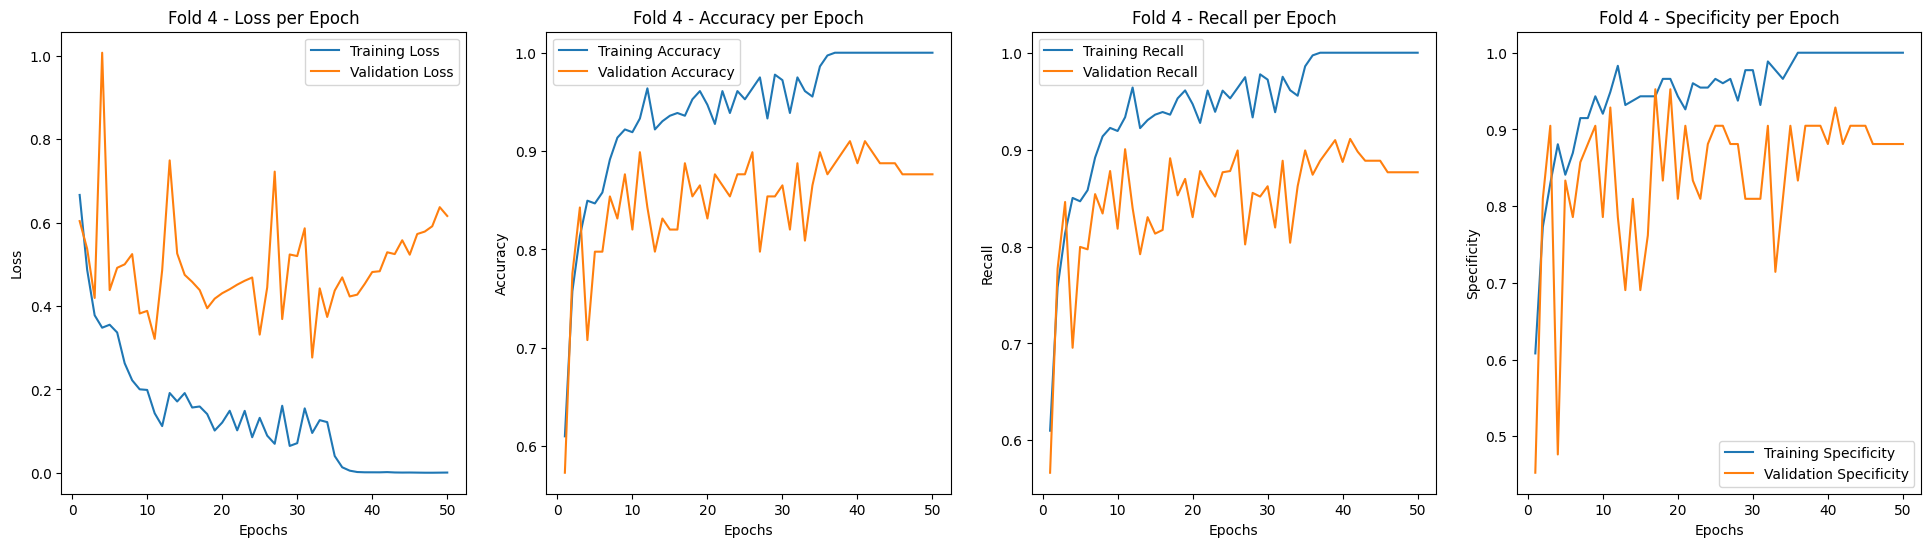

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/50, Loss: 0.66, Accuracy: 0.60, Recall: 0.60, Specificity: 0.60, Validation Loss: 0.57, Validation Accuracy: 0.63, Validation Recall: 0.64, Validation Specificity: 0.80
Epoch 2/50, Loss: 0.49, Accuracy: 0.74, Recall: 0.74, Specificity: 0.79, Validation Loss: 0.58, Validation Accuracy: 0.70, Validation Recall: 0.69, Validation Specificity: 0.65
Epoch 3/50, Loss: 0.39, Accuracy: 0.83, Recall: 0.83, Specificity: 0.85, Validation Loss: 0.36, Validation Accuracy: 0.81, Validation Recall: 0.81, Validation Specificity: 0.82
Epoch 4/50, Loss: 0.33, Accuracy: 0.87, Recall: 0.87, Specificity: 0.90, Validation Loss: 0.38, Validation Accuracy: 0.84, Validation Recall: 0.84, Validation Specificity: 0.78
Epoch 5/50, Loss: 0.29, Accuracy: 0.88, Recall: 0.88, Specificity: 0.89, Validation Loss: 0.27, Validation Accuracy: 0.89, Validation Recall: 0.88, Validation Specificity: 0.85
Epoch 6/50, Loss: 0.28, Accuracy: 0.88, Recall: 0.88, Specificity: 0.88, Validation Loss: 0.32, Validation Accuracy

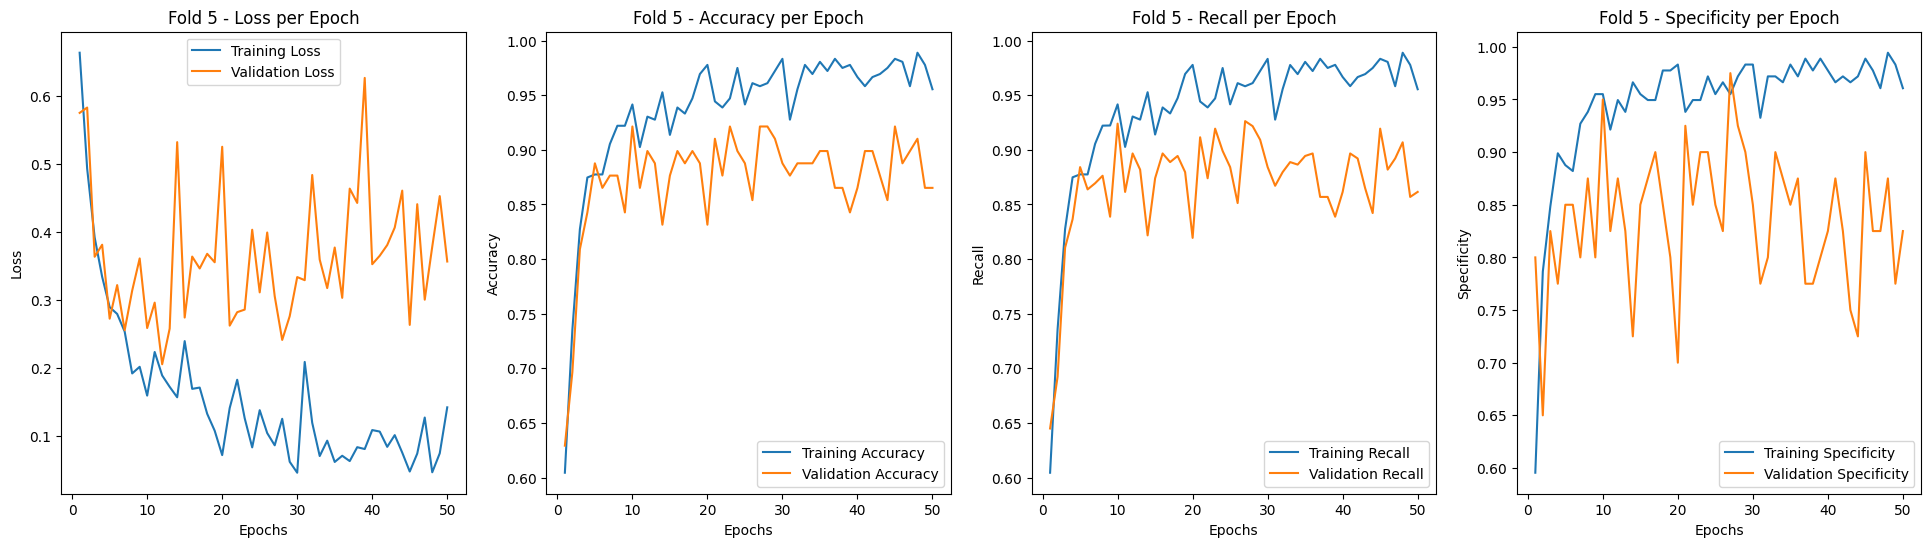

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.02 - Train Accuracy: 0.99 - Train Recall: 0.99 - Train Specificity: 0.99
           - Validation Loss: 0.21 - Validation Accuracy: 0.94 - Validation Recall: 0.95 - Validation Specificity: 0.91
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.06 - Train Accuracy: 0.97 - Train Recall: 0.97 - Train Specificity: 0.97
           - Validation Loss: 0.35 - Validation Accuracy: 0.91 - Validation Recall: 0.91 - Validation Specificity: 0.94
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.06 - Train Accuracy: 0.98 - Train Recall: 0.98 - Train Specificity: 0.99
           - Validation Loss: 0.33 - Validation Accuracy: 0.90 - Validation Recall: 0.90 - Validation Specificity: 0.98
---------------------------------------

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('multi_scale_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=8, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=8, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())


        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')

        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

        # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [108]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\218939914.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.98      0.91      0.95        47
      Normal       0.91      0.98      0.94        43

    accuracy                           0.94        90
   macro avg       0.95      0.95      0.94        90
weighted avg       0.95      0.94      0.94        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.90      0.94      0.92        47
      Normal       0.93      0.88      0.90        43

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\218939914.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.84      0.98      0.90        42
      Normal       0.98      0.83      0.90        48

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.86      0.88      0.87        42
      Normal       0.89      0.87      0.88        47

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\218939914.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.87      0.82      0.85        40
      Normal       0.86      0.90      0.88        49

    accuracy                           0.87        89
   macro avg       0.87      0.86      0.86        89
weighted avg       0.87      0.87      0.86        89

--------------------------------------------------------------------------------


In [109]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2527314652.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 1
Accuracy: 0.9444
Precision: 0.9452
F1-Score: 0.9444
Sensitivity (Recall for MI): 0.9767
Specificity (True Negative Rate): 0.9149
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.9111
Precision: 0.9124
F1-Score: 0.9107
Sensitivity (Recall for MI): 0.8837
Specificity (True Negative Rate): 0.9362
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2527314652.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 3
Accuracy: 0.9000
Precision: 0.9062
F1-Score: 0.9000
Sensitivity (Recall for MI): 0.8333
Specificity (True Negative Rate): 0.9762
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.8764
Precision: 0.8759
F1-Score: 0.8762
Sensitivity (Recall for MI): 0.8723
Specificity (True Negative Rate): 0.8810
--------------------------------------------------------------------------------
Metrics for Fold 5
Accuracy: 0.8652
Precision: 0.8656
F1-Score: 0.8631
Sensitivity (Recall for MI): 0.8980
Specificity (True Negative Rate): 0.8250
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2527314652.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3178215828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

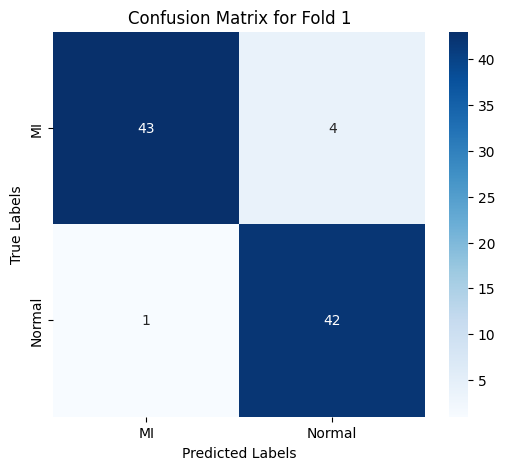

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3178215828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

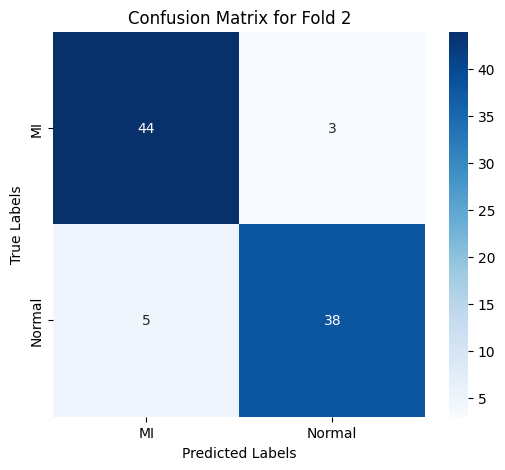

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3178215828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

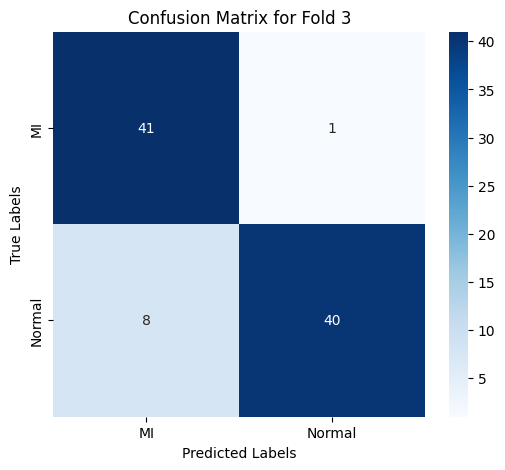

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3178215828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

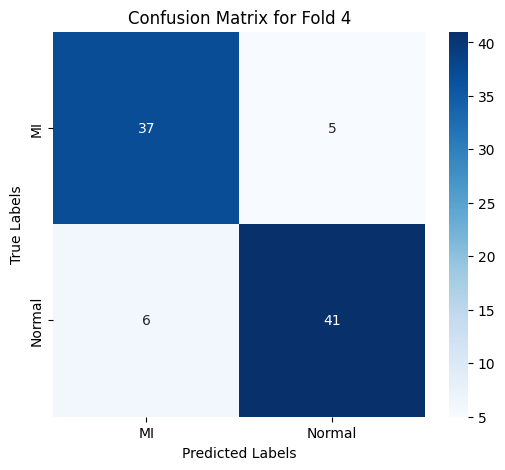

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3178215828.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

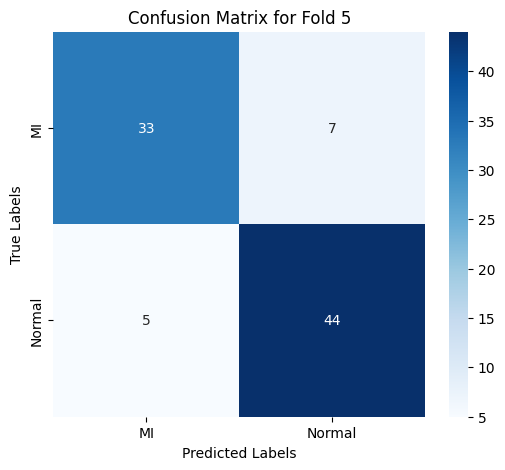

--------------------------------------------------------------------------------


In [110]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## (Tuning) Spectral with Transformer Encoder 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import itertools

# Hyperparameter yang ingin dicoba
param_grid = {
    'batch_size': [8, 16, 32, 64],
    'num_epochs': [10, 20, 50, 100]
}

# Semua kombinasi hyperparameter
param_combinations = list(itertools.product(param_grid['batch_size'], param_grid['num_epochs']))

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk training model
def train_and_evaluate_model(batch_size, num_epochs):
    fold_no = 1
    val_accuracy_per_fold = []

    for train_index, val_index in kf.split(X_train_tensor):
        print(f'Fold {fold_no}')

        # Membagi data
        X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
        y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

        # Membuat TensorDataset untuk train dan validation fold
        train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
        val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)

        # Inisialisasi model dan optimizer
        model = TransformerModel(input_dim, num_classes)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)  # Tetap gunakan lr yang sama

        # Training loop
        for epoch in range(num_epochs):
            model.train()
            for X_batch, y_batch in train_loader_fold:
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluasi pada data validasi
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_accuracy = 100 * correct_val / total_val
        val_accuracy_per_fold.append(val_accuracy)
        fold_no += 1

    # Rata-rata akurasi validasi
    avg_val_accuracy = sum(val_accuracy_per_fold) / len(val_accuracy_per_fold)
    return avg_val_accuracy

# Melakukan Grid Search
best_accuracy = 0
best_params = None

for (batch_size, num_epochs) in param_combinations:
    print(f'Trying hyperparameters: batch_size={batch_size}, num_epochs={num_epochs}')
    val_accuracy = train_and_evaluate_model(batch_size, num_epochs)
    print(f'Validation Accuracy: {val_accuracy:.2f}%')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = (batch_size, num_epochs)

print('Best Hyperparameters:')
print(f'Batch Size: {best_params[0]}, Epochs: {best_params[1]}')
print(f'Best Validation Accuracy: {best_accuracy:.2f}%')


Trying hyperparameters: batch_size=8, num_epochs=10
Fold 1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.39%
Trying hyperparameters: batch_size=8, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.06%
Trying hyperparameters: batch_size=8, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 86.84%
Trying hyperparameters: batch_size=8, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.94%
Trying hyperparameters: batch_size=16, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.50%
Trying hyperparameters: batch_size=16, num_epochs=20
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 89.50%
Trying hyperparameters: batch_size=16, num_epochs=50
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 88.16%
Trying hyperparameters: batch_size=16, num_epochs=100
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 90.83%
Trying hyperparameters: batch_size=32, num_epochs=10
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Validation Accuracy: 87.26%
Trying hyperparam

In [180]:
selected_columns = ['MFCC Means', 'MFCC std', 'MFCC max', 'MFCC min', 'Med_mfcc', 'Var_mfcc', 'Skew_mfcc', 'Q1_mfcc', 'Q3_mfcc', 'IQR_mfcc', 'MinMax_mfcc', 'Kurt_mfcc', 'Label']
# Membuat dataframe baru dengan kolom pilihan
df_spectral = df_combine_scaled[selected_columns]

# Menampilkan dataframe baru
print(df_spectral.head())

   MFCC Means  MFCC std  MFCC max  MFCC min  Med_mfcc  Var_mfcc  Skew_mfcc  \
0    0.805298 -0.893321  0.727190  0.942132 -0.598371 -0.921706  -0.321473   
1   -0.228878  0.601932 -2.114222 -0.483793  1.257240  0.594724  -0.971689   
2    0.629472 -0.027778 -0.754010  0.036559  2.398342 -0.062456  -0.766293   
3    1.530227 -1.566485  1.255310  1.583813 -0.171921 -1.554723  -0.653024   
4   -0.680597  0.530428 -0.464613 -0.596863  0.842127  0.518742  -0.035472   

    Q1_mfcc   Q3_mfcc  IQR_mfcc  MinMax_mfcc  Kurt_mfcc Label  
0  0.734321 -0.816269 -1.060130    -0.538695   0.334547    MI  
1  0.669311  0.773221  0.321963    -0.347450   0.964492    MI  
2  0.749218  1.135122  0.589301    -0.301331   0.758335    MI  
3  0.715255 -0.219460 -0.543864    -0.893826   0.690955    MI  
4 -0.499815  0.770667  0.904191     0.339870   0.007908    MI  


In [181]:
X = df_spectral.drop('Label', axis=1).values
y = df_spectral['Label'].values

In [182]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.64, Accuracy: 0.65, Recall: 0.64, Specificity: 0.61, Validation Loss: 0.54, Validation Accuracy: 0.72, Validation Recall: 0.72, Validation Specificity: 0.81
Epoch 2/100, Loss: 0.57, Accuracy: 0.68, Recall: 0.68, Specificity: 0.67, Validation Loss: 0.58, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.77
Epoch 3/100, Loss: 0.55, Accuracy: 0.71, Recall: 0.71, Specificity: 0.81, Validation Loss: 0.54, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.87
Epoch 4/100, Loss: 0.52, Accuracy: 0.73, Recall: 0.73, Specificity: 0.77, Validation Loss: 0.64, Validation Accuracy: 0.64, Validation Recall: 0.65, Validation Specificity: 0.60
Epoch 5/100, Loss: 0.54, Accuracy: 0.72, Recall: 0.71, Specificity: 0.65, Validation Loss: 0.53, Validation Accuracy: 0.74, Validation Recall: 0.74, Validation Specificity: 0.89
Epoch 6/100, Loss: 0.50, Accuracy: 0.73, Recall: 0.73, Specificity: 0.72, Validation Loss: 0.53, Validation Ac

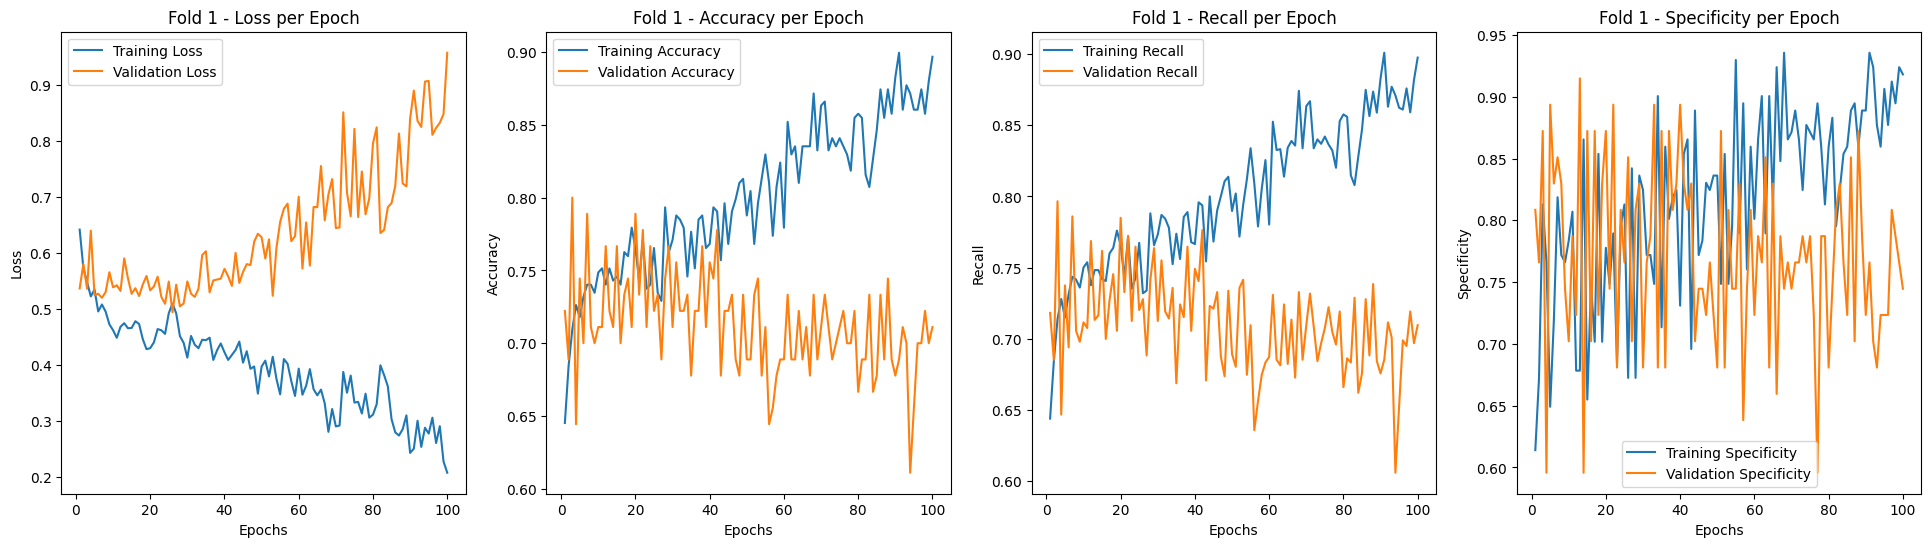

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.64, Accuracy: 0.62, Recall: 0.62, Specificity: 0.62, Validation Loss: 0.53, Validation Accuracy: 0.74, Validation Recall: 0.74, Validation Specificity: 0.81
Epoch 2/100, Loss: 0.62, Accuracy: 0.67, Recall: 0.68, Specificity: 0.84, Validation Loss: 0.58, Validation Accuracy: 0.67, Validation Recall: 0.67, Validation Specificity: 0.55
Epoch 3/100, Loss: 0.56, Accuracy: 0.69, Recall: 0.68, Specificity: 0.60, Validation Loss: 0.52, Validation Accuracy: 0.74, Validation Recall: 0.74, Validation Specificity: 0.89
Epoch 4/100, Loss: 0.51, Accuracy: 0.75, Recall: 0.75, Specificity: 0.80, Validation Loss: 0.54, Validation Accuracy: 0.81, Validation Recall: 0.81, Validation Specificity: 0.77
Epoch 5/100, Loss: 0.52, Accuracy: 0.72, Recall: 0.72, Specificity: 0.71, Validation Loss: 0.54, Validation Accuracy: 0.76, Validation Recall: 0.75, Validation Specificity: 0.89
Epoch 6/100, Loss: 0.58, Accuracy: 0.70, Recall: 0.71, Specificity: 0.83, Validation Loss: 0.57, Validation Ac

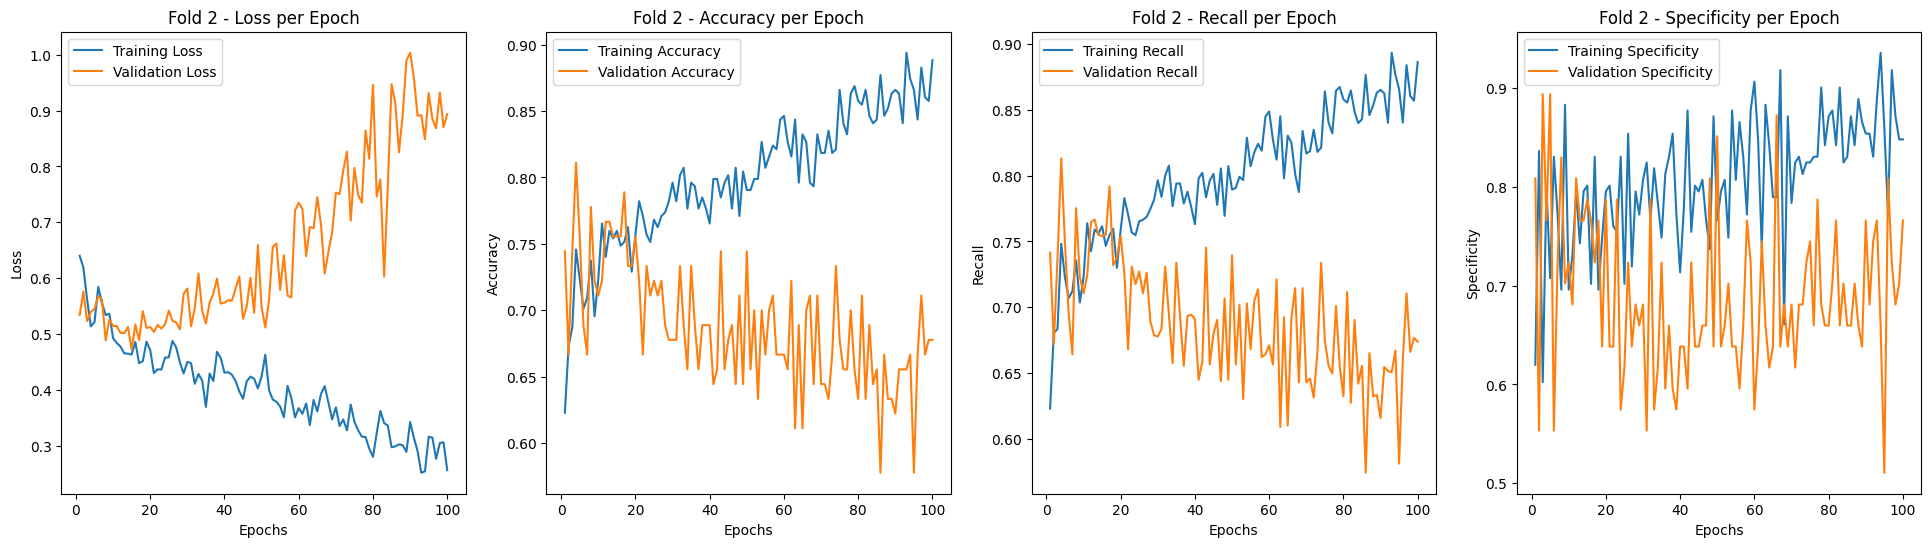

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.66, Accuracy: 0.65, Recall: 0.65, Specificity: 0.70, Validation Loss: 0.70, Validation Accuracy: 0.63, Validation Recall: 0.62, Validation Specificity: 0.48
Epoch 2/100, Loss: 0.57, Accuracy: 0.66, Recall: 0.66, Specificity: 0.59, Validation Loss: 0.70, Validation Accuracy: 0.63, Validation Recall: 0.65, Validation Specificity: 0.83
Epoch 3/100, Loss: 0.57, Accuracy: 0.71, Recall: 0.71, Specificity: 0.78, Validation Loss: 0.59, Validation Accuracy: 0.63, Validation Recall: 0.64, Validation Specificity: 0.67
Epoch 4/100, Loss: 0.52, Accuracy: 0.74, Recall: 0.74, Specificity: 0.80, Validation Loss: 0.59, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.67
Epoch 5/100, Loss: 0.52, Accuracy: 0.74, Recall: 0.74, Specificity: 0.64, Validation Loss: 0.65, Validation Accuracy: 0.68, Validation Recall: 0.69, Validation Specificity: 0.81
Epoch 6/100, Loss: 0.54, Accuracy: 0.75, Recall: 0.75, Specificity: 0.91, Validation Loss: 0.64, Validation Ac

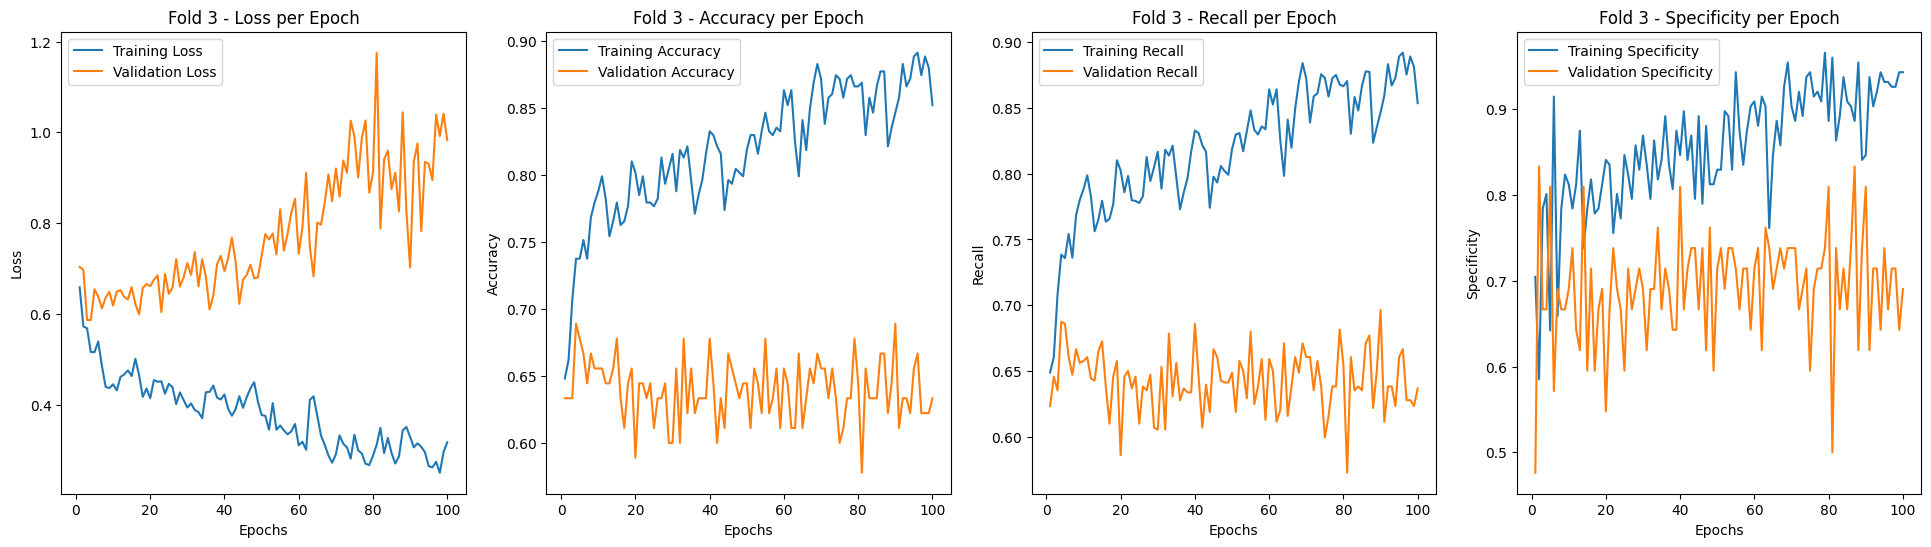

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.66, Accuracy: 0.64, Recall: 0.64, Specificity: 0.66, Validation Loss: 0.53, Validation Accuracy: 0.65, Validation Recall: 0.65, Validation Specificity: 0.60
Epoch 2/100, Loss: 0.55, Accuracy: 0.70, Recall: 0.70, Specificity: 0.67, Validation Loss: 0.57, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.86
Epoch 3/100, Loss: 0.50, Accuracy: 0.74, Recall: 0.74, Specificity: 0.77, Validation Loss: 0.61, Validation Accuracy: 0.62, Validation Recall: 0.61, Validation Specificity: 0.52
Epoch 4/100, Loss: 0.54, Accuracy: 0.74, Recall: 0.74, Specificity: 0.79, Validation Loss: 0.58, Validation Accuracy: 0.62, Validation Recall: 0.62, Validation Specificity: 0.64
Epoch 5/100, Loss: 0.51, Accuracy: 0.72, Recall: 0.72, Specificity: 0.62, Validation Loss: 0.55, Validation Accuracy: 0.67, Validation Recall: 0.68, Validation Specificity: 0.76
Epoch 6/100, Loss: 0.50, Accuracy: 0.74, Recall: 0.74, Specificity: 0.81, Validation Loss: 0.59, Validation Ac

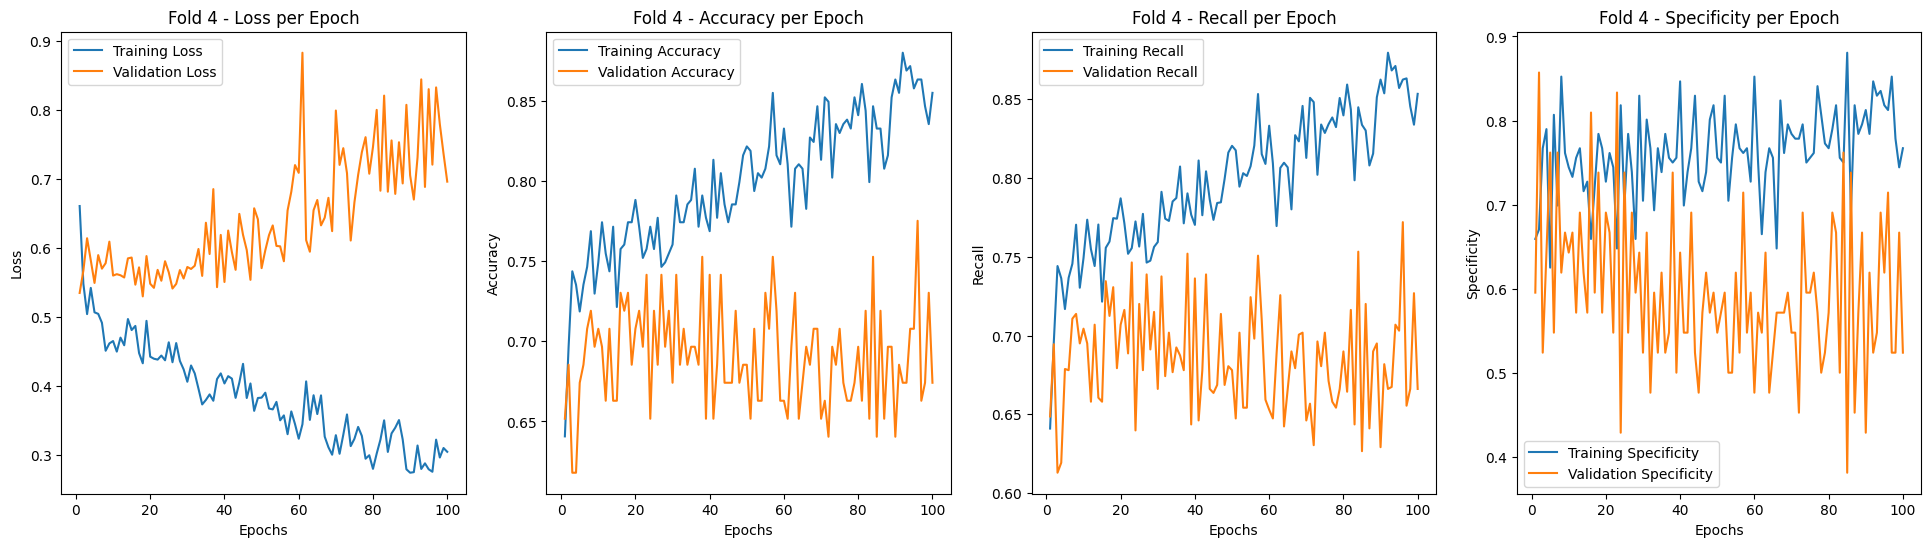

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.64, Accuracy: 0.64, Recall: 0.64, Specificity: 0.63, Validation Loss: 0.64, Validation Accuracy: 0.63, Validation Recall: 0.66, Validation Specificity: 0.93
Epoch 2/100, Loss: 0.59, Accuracy: 0.66, Recall: 0.66, Specificity: 0.63, Validation Loss: 0.53, Validation Accuracy: 0.73, Validation Recall: 0.73, Validation Specificity: 0.72
Epoch 3/100, Loss: 0.55, Accuracy: 0.72, Recall: 0.72, Specificity: 0.85, Validation Loss: 0.66, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.70
Epoch 4/100, Loss: 0.53, Accuracy: 0.70, Recall: 0.70, Specificity: 0.72, Validation Loss: 0.56, Validation Accuracy: 0.69, Validation Recall: 0.70, Validation Specificity: 0.80
Epoch 5/100, Loss: 0.50, Accuracy: 0.74, Recall: 0.74, Specificity: 0.73, Validation Loss: 0.55, Validation Accuracy: 0.70, Validation Recall: 0.70, Validation Specificity: 0.70
Epoch 6/100, Loss: 0.54, Accuracy: 0.73, Recall: 0.73, Specificity: 0.86, Validation Loss: 0.61, Validation Ac

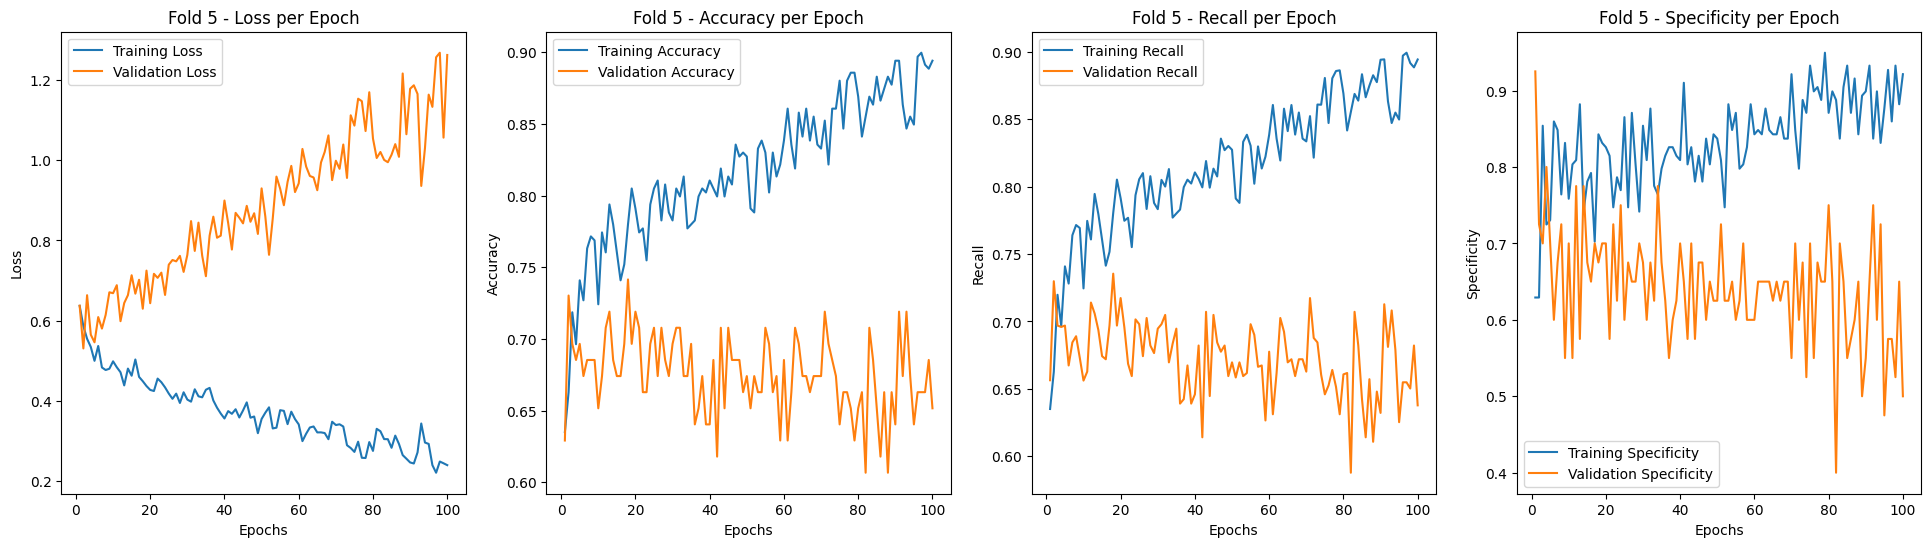

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.21 - Train Accuracy: 0.90 - Train Recall: 0.90 - Train Specificity: 0.92
           - Validation Loss: 0.96 - Validation Accuracy: 0.71 - Validation Recall: 0.71 - Validation Specificity: 0.74
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.26 - Train Accuracy: 0.89 - Train Recall: 0.89 - Train Specificity: 0.85
           - Validation Loss: 0.89 - Validation Accuracy: 0.68 - Validation Recall: 0.67 - Validation Specificity: 0.77
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.32 - Train Accuracy: 0.85 - Train Recall: 0.85 - Train Specificity: 0.94
           - Validation Loss: 0.98 - Validation Accuracy: 0.63 - Validation Recall: 0.64 - Validation Specificity: 0.69
---------------------------------------

In [185]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('tuning_spectral_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()
            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')
        
        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

        # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')
        

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'tuning_spectral_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [186]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_spectral_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\4163667791.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.71      0.74      0.73        47
      Normal       0.71      0.67      0.69        43

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.67      0.77      0.71        47
      Normal       0.69      0.58      0.63        43

    accuracy                           0.68        90
   macro avg       0.68      0.67      0.67        90
weighted avg       0.68      0.68      0.67        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\4163667791.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.59      0.69      0.64        42
      Normal       0.68      0.58      0.63        48

    accuracy                           0.63        90
   macro avg       0.64      0.64      0.63        90
weighted avg       0.64      0.63      0.63        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.71      0.52      0.60        42
      Normal       0.66      0.81      0.72        47

    accuracy                           0.67        89
   macro avg       0.68      0.67      0.66        89
weighted avg       0.68      0.67      0.67        89

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\4163667791.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.65      0.50      0.56        40
      Normal       0.66      0.78      0.71        49

    accuracy                           0.65        89
   macro avg       0.65      0.64      0.64        89
weighted avg       0.65      0.65      0.64        89

--------------------------------------------------------------------------------


In [187]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_spectral_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3376505012.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 1
Accuracy: 0.7111
Precision: 0.7108
F1-Score: 0.7098
Sensitivity (Recall for MI): 0.6744
Specificity (True Negative Rate): 0.7447
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.6778
Precision: 0.6806
F1-Score: 0.6729
Sensitivity (Recall for MI): 0.5814
Specificity (True Negative Rate): 0.7660
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3376505012.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 3
Accuracy: 0.6333
Precision: 0.6374
F1-Score: 0.6333
Sensitivity (Recall for MI): 0.5833
Specificity (True Negative Rate): 0.6905
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.6742
Precision: 0.6824
F1-Score: 0.6633
Sensitivity (Recall for MI): 0.8085
Specificity (True Negative Rate): 0.5238
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3376505012.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 5
Accuracy: 0.6517
Precision: 0.6502
F1-Score: 0.6368
Sensitivity (Recall for MI): 0.7755
Specificity (True Negative Rate): 0.5000
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2056979385.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

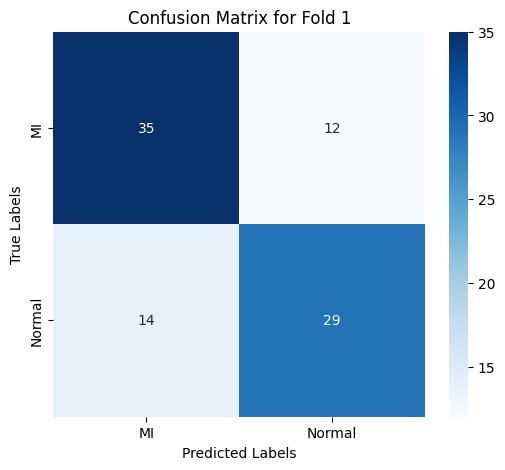

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2056979385.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

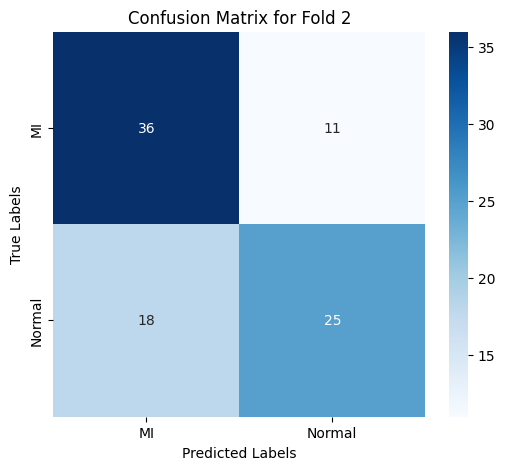

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2056979385.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

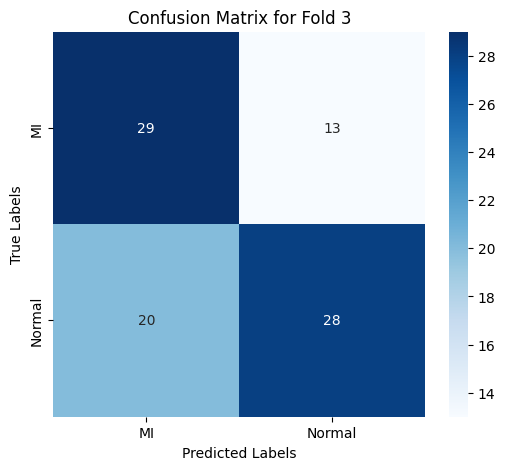

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2056979385.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

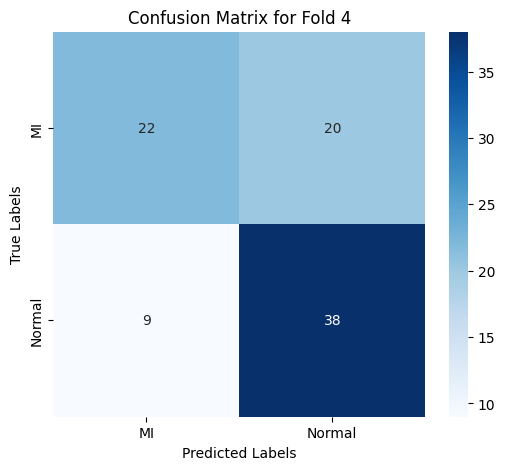

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2056979385.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

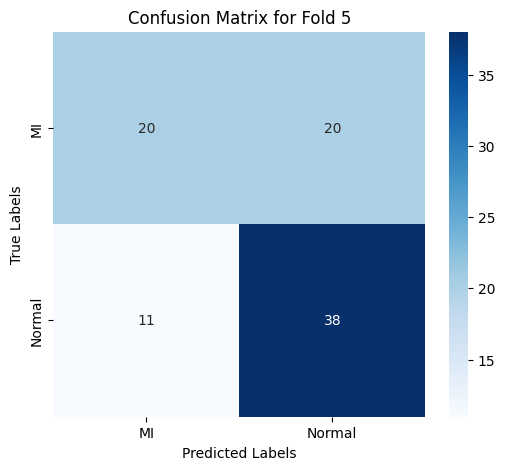

--------------------------------------------------------------------------------


In [188]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_spectral_transformer_encoder/transformer_encoder_model_tuning_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## (Tuning) Temporal with Transformer Encoder

In [189]:
selected_columns = ['Entropy', 'Wavelet Means', 'Wavelet std', 'Wavelet max', 'Wavelet min', 'Med_wavelet', 'Var_wavelet', 'Skew_wavelet', 'Q1_wavelet', 'Q3_wavelet', 'IQR_wavelet', 'MinMax_wavelet', 'Kurt_wavelet', 'Label']
# Membuat dataframe baru dengan kolom pilihan
df_temporal = df_combine_scaled[selected_columns]

# Menampilkan dataframe baru
print(df_temporal.head())

    Entropy  Wavelet Means  Wavelet std  Wavelet max  Wavelet min  \
0  0.063608      -1.137174    -0.430682     0.024031     0.004692   
1  0.064888      -0.388901    -0.565070    -0.549047     0.441349   
2  0.063367       0.180394    -0.112938    -0.376300     0.355416   
3  0.068559       0.408853     1.567008     1.825143    -0.973889   
4  0.062193      -0.404628    -0.506024    -0.423697     0.363664   

   Med_wavelet  Var_wavelet  Skew_wavelet  Q1_wavelet  Q3_wavelet  \
0    -0.889833    -0.218548      1.146071   -0.076698    0.026616   
1    -0.241600    -0.239203     -0.594643    0.178925   -0.172615   
2     1.042363    -0.151908     -0.491310   -0.838081    0.944422   
3     0.205136     0.616326      2.953232   -0.848416    0.973499   
4     0.454240    -0.230679     -0.101673   -0.313961    0.340572   

   IQR_wavelet  MinMax_wavelet  Kurt_wavelet Label  
0     0.051833        0.226780      1.470453    MI  
1    -0.176615       -0.536473     -0.367429    MI  
2     0.895

In [190]:
X = df_temporal.drop('Label', axis=1).values
y = df_temporal['Label'].values

In [191]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.76, Accuracy: 0.51, Recall: 0.51, Specificity: 0.47, Validation Loss: 0.67, Validation Accuracy: 0.59, Validation Recall: 0.58, Validation Specificity: 0.79
Epoch 2/100, Loss: 0.67, Accuracy: 0.57, Recall: 0.56, Specificity: 0.42, Validation Loss: 0.58, Validation Accuracy: 0.67, Validation Recall: 0.66, Validation Specificity: 0.81
Epoch 3/100, Loss: 0.60, Accuracy: 0.66, Recall: 0.67, Specificity: 0.68, Validation Loss: 0.60, Validation Accuracy: 0.63, Validation Recall: 0.63, Validation Specificity: 0.66
Epoch 4/100, Loss: 0.54, Accuracy: 0.71, Recall: 0.71, Specificity: 0.67, Validation Loss: 0.52, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.83
Epoch 5/100, Loss: 0.50, Accuracy: 0.75, Recall: 0.75, Specificity: 0.82, Validation Loss: 0.44, Validation Accuracy: 0.76, Validation Recall: 0.75, Validation Specificity: 0.79
Epoch 6/100, Loss: 0.39, Accuracy: 0.81, Recall: 0.81, Specificity: 0.81, Validation Loss: 0.35, Validation Ac

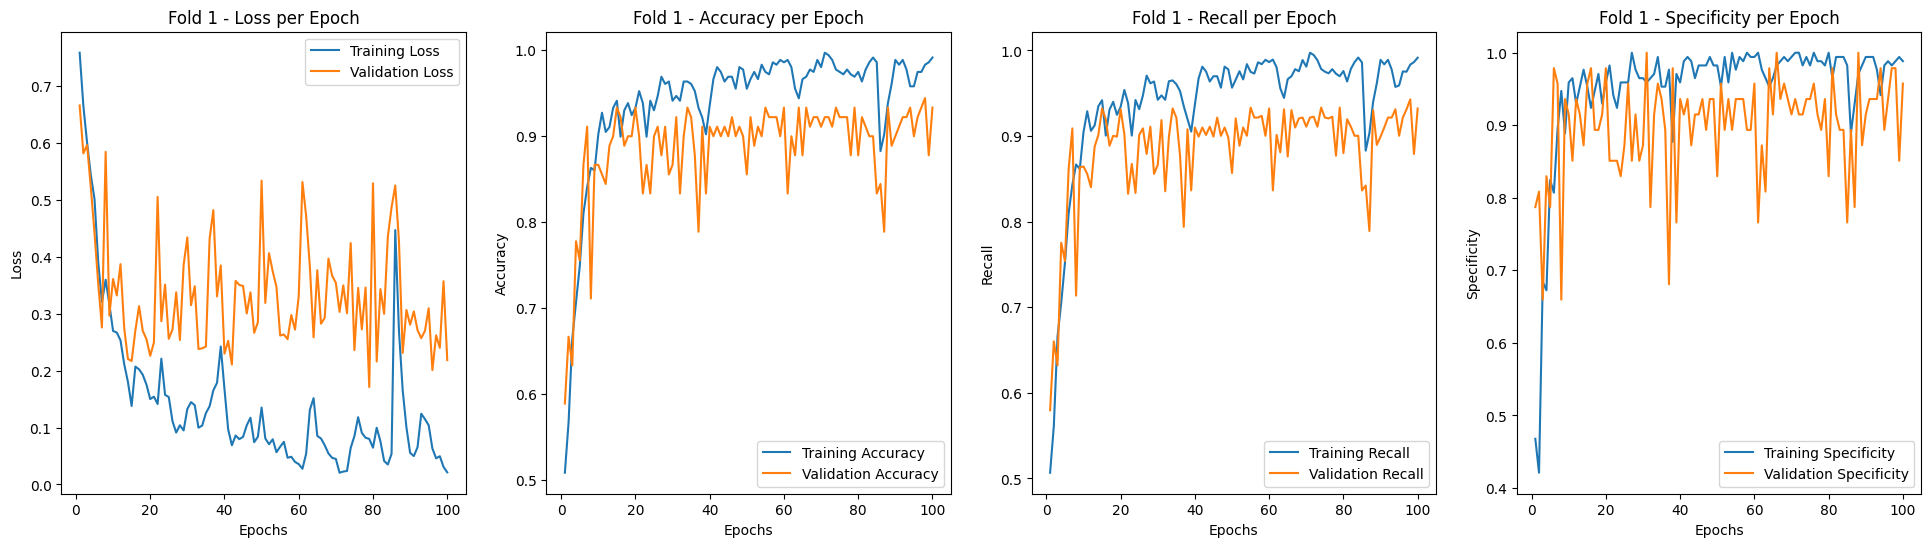

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.75, Accuracy: 0.54, Recall: 0.54, Specificity: 0.54, Validation Loss: 0.70, Validation Accuracy: 0.50, Validation Recall: 0.51, Validation Specificity: 0.32
Epoch 2/100, Loss: 0.69, Accuracy: 0.58, Recall: 0.58, Specificity: 0.63, Validation Loss: 0.67, Validation Accuracy: 0.58, Validation Recall: 0.59, Validation Specificity: 0.34
Epoch 3/100, Loss: 0.63, Accuracy: 0.59, Recall: 0.58, Specificity: 0.50, Validation Loss: 0.60, Validation Accuracy: 0.74, Validation Recall: 0.74, Validation Specificity: 0.89
Epoch 4/100, Loss: 0.57, Accuracy: 0.66, Recall: 0.66, Specificity: 0.65, Validation Loss: 0.54, Validation Accuracy: 0.71, Validation Recall: 0.71, Validation Specificity: 0.77
Epoch 5/100, Loss: 0.49, Accuracy: 0.72, Recall: 0.72, Specificity: 0.75, Validation Loss: 0.48, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.83
Epoch 6/100, Loss: 0.36, Accuracy: 0.83, Recall: 0.83, Specificity: 0.88, Validation Loss: 0.39, Validation Ac

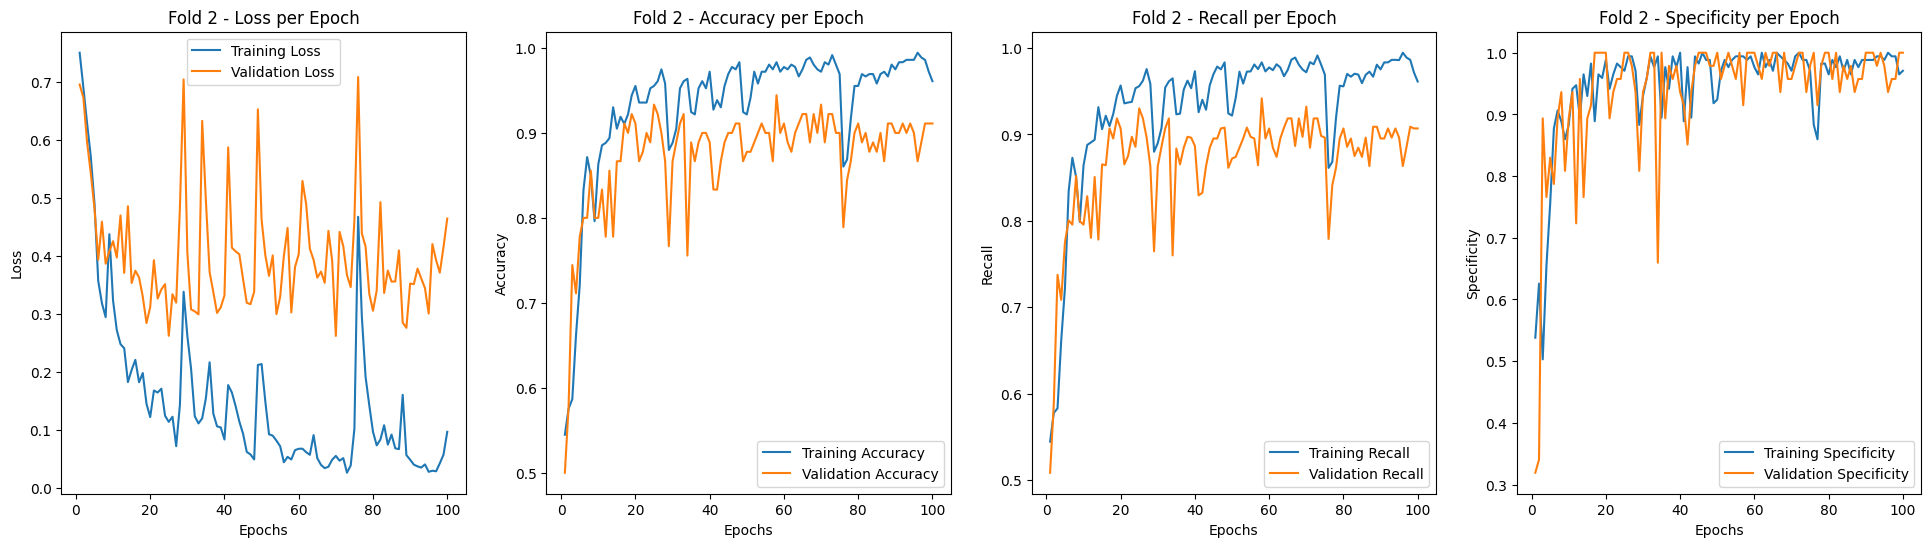

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.73, Accuracy: 0.57, Recall: 0.57, Specificity: 0.62, Validation Loss: 0.73, Validation Accuracy: 0.60, Validation Recall: 0.60, Validation Specificity: 0.55
Epoch 2/100, Loss: 0.68, Accuracy: 0.60, Recall: 0.60, Specificity: 0.60, Validation Loss: 0.63, Validation Accuracy: 0.62, Validation Recall: 0.61, Validation Specificity: 0.45
Epoch 3/100, Loss: 0.60, Accuracy: 0.67, Recall: 0.67, Specificity: 0.74, Validation Loss: 0.62, Validation Accuracy: 0.68, Validation Recall: 0.68, Validation Specificity: 0.71
Epoch 4/100, Loss: 0.52, Accuracy: 0.71, Recall: 0.71, Specificity: 0.74, Validation Loss: 0.49, Validation Accuracy: 0.77, Validation Recall: 0.77, Validation Specificity: 0.83
Epoch 5/100, Loss: 0.46, Accuracy: 0.77, Recall: 0.77, Specificity: 0.77, Validation Loss: 0.52, Validation Accuracy: 0.77, Validation Recall: 0.77, Validation Specificity: 0.86
Epoch 6/100, Loss: 0.41, Accuracy: 0.79, Recall: 0.79, Specificity: 0.87, Validation Loss: 0.35, Validation Ac

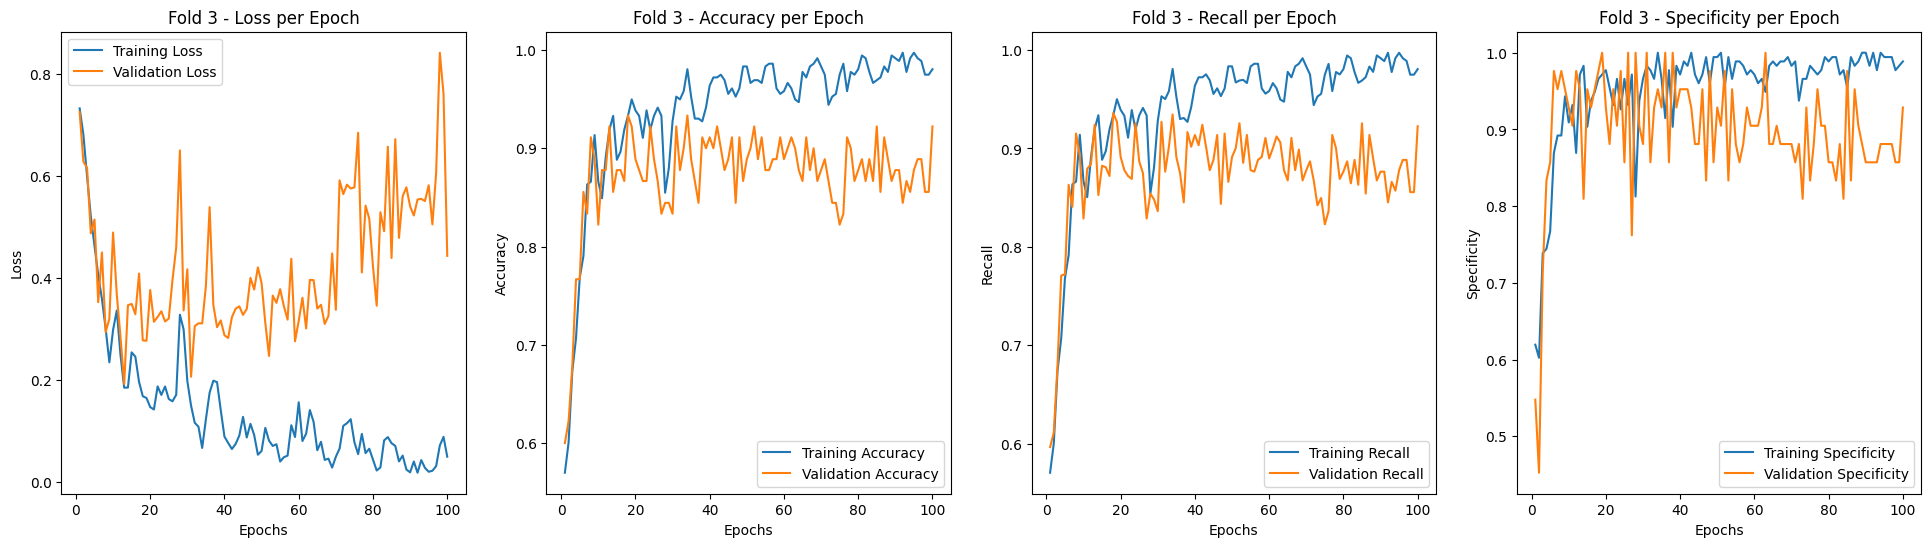

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.74, Accuracy: 0.52, Recall: 0.51, Specificity: 0.47, Validation Loss: 0.76, Validation Accuracy: 0.56, Validation Recall: 0.57, Validation Specificity: 0.76
Epoch 2/100, Loss: 0.64, Accuracy: 0.64, Recall: 0.64, Specificity: 0.77, Validation Loss: 0.67, Validation Accuracy: 0.55, Validation Recall: 0.53, Validation Specificity: 0.12
Epoch 3/100, Loss: 0.58, Accuracy: 0.67, Recall: 0.66, Specificity: 0.61, Validation Loss: 0.63, Validation Accuracy: 0.61, Validation Recall: 0.62, Validation Specificity: 0.90
Epoch 4/100, Loss: 0.51, Accuracy: 0.74, Recall: 0.74, Specificity: 0.78, Validation Loss: 0.55, Validation Accuracy: 0.69, Validation Recall: 0.69, Validation Specificity: 0.83
Epoch 5/100, Loss: 0.40, Accuracy: 0.83, Recall: 0.83, Specificity: 0.93, Validation Loss: 0.51, Validation Accuracy: 0.75, Validation Recall: 0.75, Validation Specificity: 0.76
Epoch 6/100, Loss: 0.33, Accuracy: 0.85, Recall: 0.85, Specificity: 0.86, Validation Loss: 0.47, Validation Ac

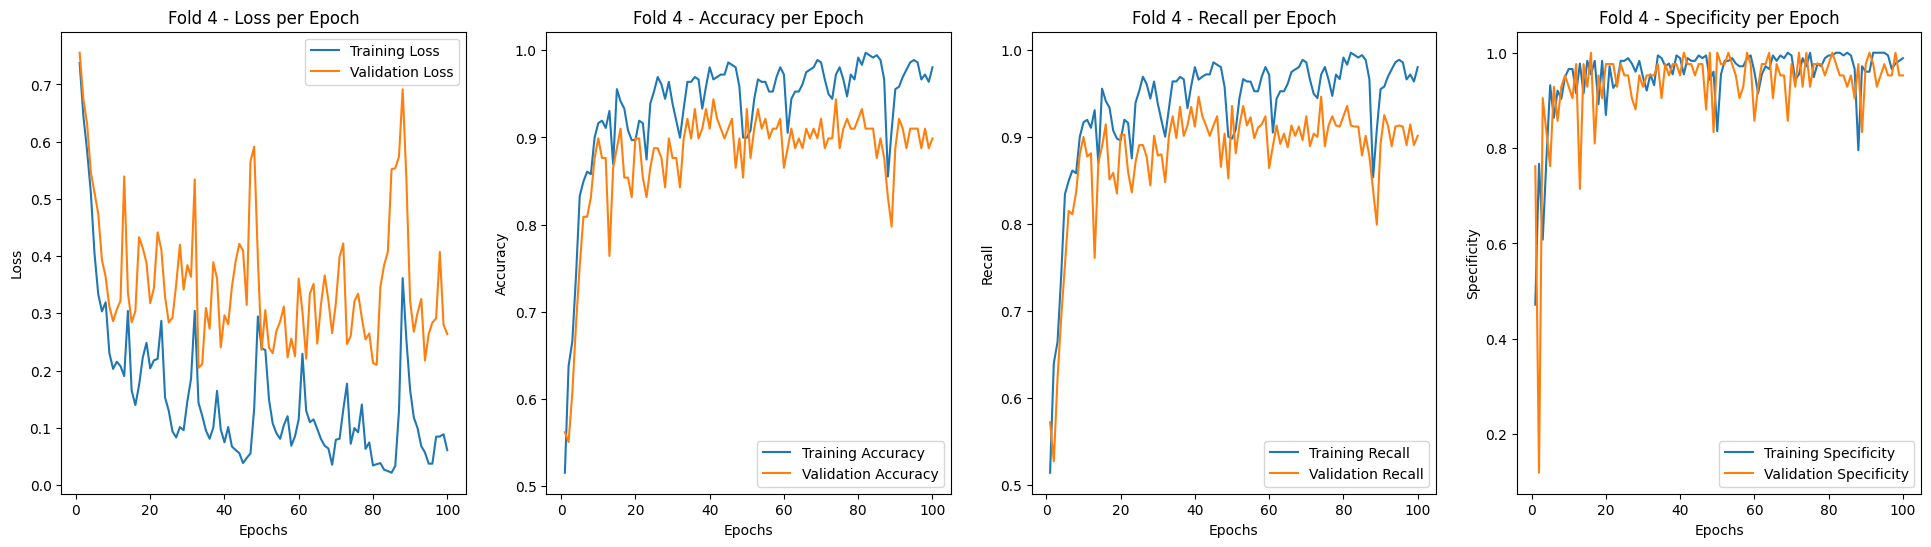

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.74, Accuracy: 0.55, Recall: 0.55, Specificity: 0.62, Validation Loss: 0.71, Validation Accuracy: 0.53, Validation Recall: 0.51, Validation Specificity: 0.33
Epoch 2/100, Loss: 0.64, Accuracy: 0.64, Recall: 0.64, Specificity: 0.71, Validation Loss: 0.63, Validation Accuracy: 0.67, Validation Recall: 0.67, Validation Specificity: 0.68
Epoch 3/100, Loss: 0.59, Accuracy: 0.67, Recall: 0.67, Specificity: 0.76, Validation Loss: 0.55, Validation Accuracy: 0.65, Validation Recall: 0.64, Validation Specificity: 0.55
Epoch 4/100, Loss: 0.52, Accuracy: 0.73, Recall: 0.73, Specificity: 0.73, Validation Loss: 0.55, Validation Accuracy: 0.64, Validation Recall: 0.64, Validation Specificity: 0.65
Epoch 5/100, Loss: 0.45, Accuracy: 0.79, Recall: 0.79, Specificity: 0.83, Validation Loss: 0.47, Validation Accuracy: 0.72, Validation Recall: 0.73, Validation Specificity: 0.88
Epoch 6/100, Loss: 0.38, Accuracy: 0.85, Recall: 0.85, Specificity: 0.94, Validation Loss: 0.44, Validation Ac

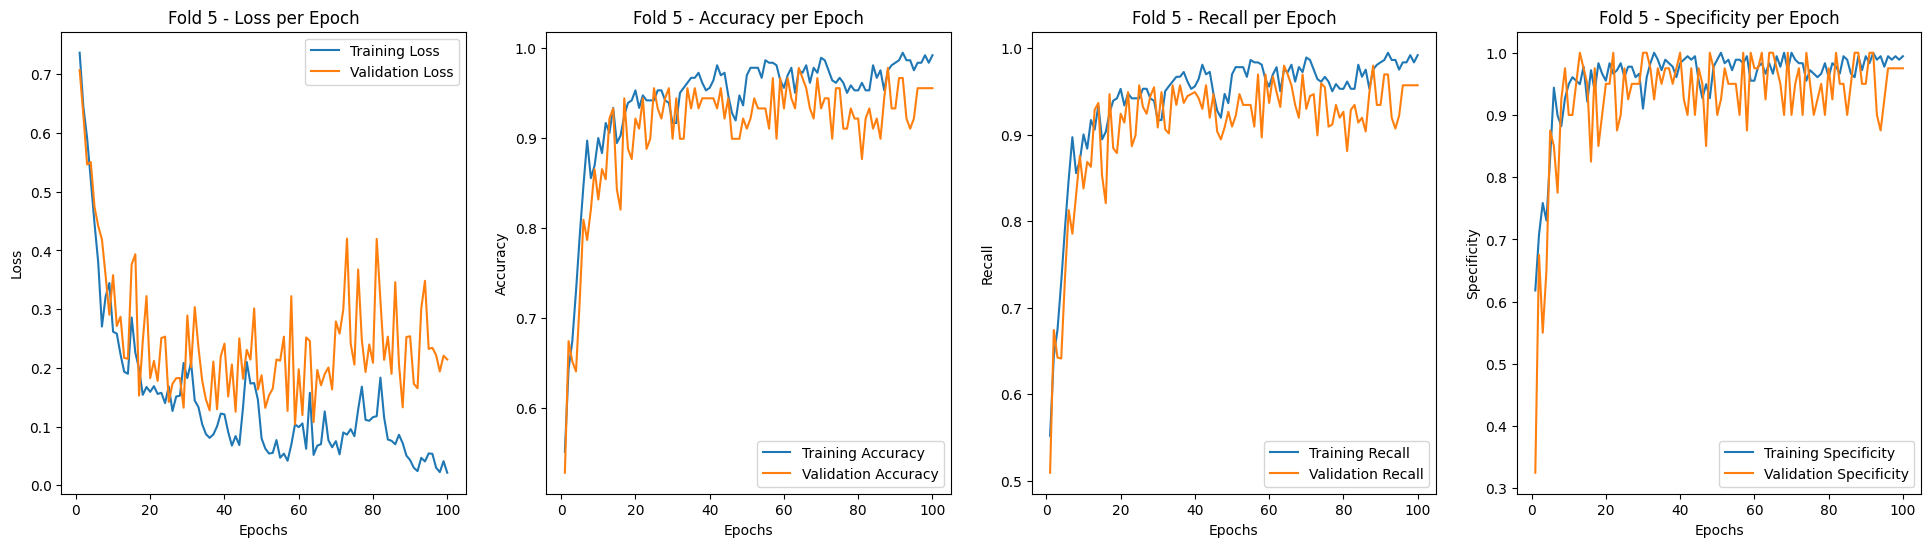

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.02 - Train Accuracy: 0.99 - Train Recall: 0.99 - Train Specificity: 0.99
           - Validation Loss: 0.22 - Validation Accuracy: 0.93 - Validation Recall: 0.93 - Validation Specificity: 0.96
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.10 - Train Accuracy: 0.96 - Train Recall: 0.96 - Train Specificity: 0.97
           - Validation Loss: 0.47 - Validation Accuracy: 0.91 - Validation Recall: 0.91 - Validation Specificity: 1.00
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.05 - Train Accuracy: 0.98 - Train Recall: 0.98 - Train Specificity: 0.99
           - Validation Loss: 0.44 - Validation Accuracy: 0.92 - Validation Recall: 0.92 - Validation Specificity: 0.93
---------------------------------------

In [194]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('tuning_temporal_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')

        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

        # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'tuning_temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [195]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2083368824.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.92      0.96      0.94        47
      Normal       0.95      0.91      0.93        43

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.85      1.00      0.92        47
      Normal       1.00      0.81      0.90        43

    accuracy                           0.91        90
   macro avg       0.93      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2083368824.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.91      0.93      0.92        42
      Normal       0.94      0.92      0.93        48

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.85      0.95      0.90        42
      Normal       0.95      0.85      0.90        47

    accuracy                           0.90        89
   macro avg       0.90      0.90      0.90        89
weighted avg       0.90      0.90      0.90        89

--------------------------------------------------------------------------------
Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.93      0

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2083368824.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

In [196]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2032434859.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 1
Accuracy: 0.9333
Precision: 0.9348
F1-Score: 0.9330
Sensitivity (Recall for MI): 0.9070
Specificity (True Negative Rate): 0.9574
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.9111
Precision: 0.9273
F1-Score: 0.9095
Sensitivity (Recall for MI): 0.8140
Specificity (True Negative Rate): 1.0000
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2032434859.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 3
Accuracy: 0.9222
Precision: 0.9216
F1-Score: 0.9220
Sensitivity (Recall for MI): 0.9167
Specificity (True Negative Rate): 0.9286
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.8989
Precision: 0.9017
F1-Score: 0.8989
Sensitivity (Recall for MI): 0.8511
Specificity (True Negative Rate): 0.9524
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\2032434859.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

Metrics for Fold 5
Accuracy: 0.9551
Precision: 0.9536
F1-Score: 0.9548
Sensitivity (Recall for MI): 0.9388
Specificity (True Negative Rate): 0.9750
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\1447014641.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

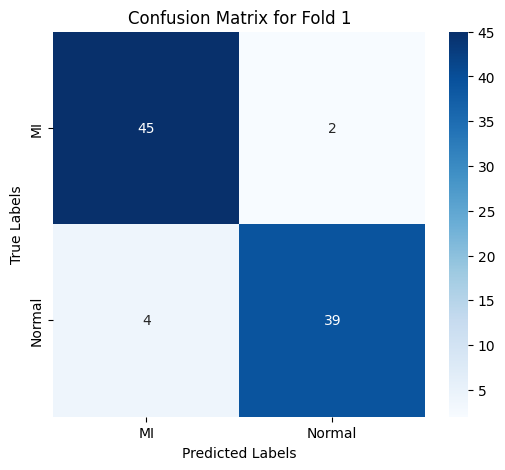

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\1447014641.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

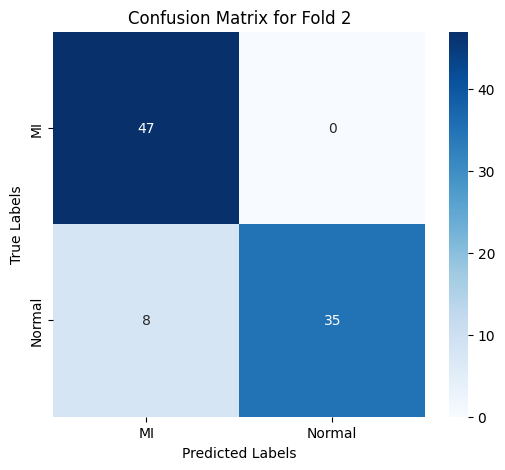

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\1447014641.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

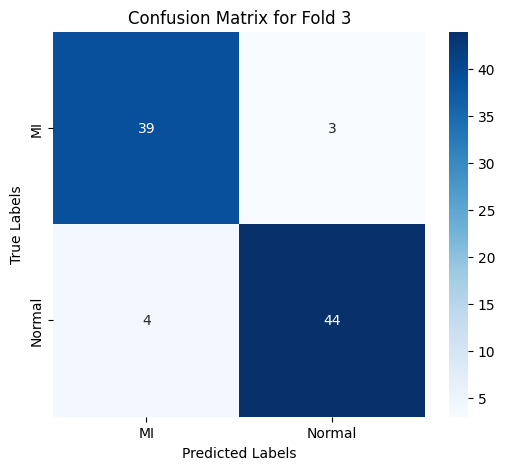

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\1447014641.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

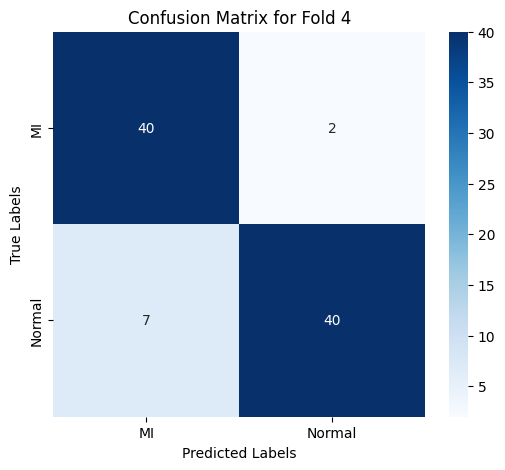

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\1447014641.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

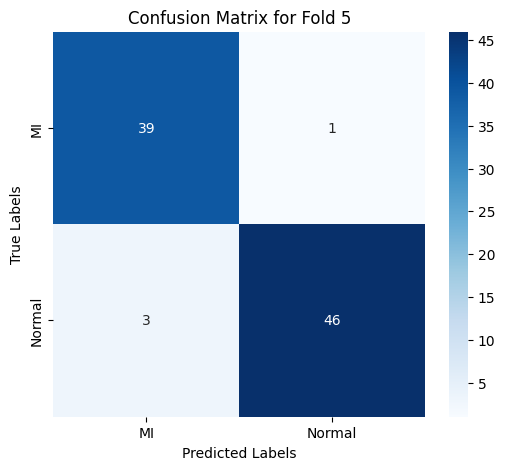

--------------------------------------------------------------------------------


In [197]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_temporal_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)


## (Tuning) Multi Scale with Transformer Encoder

In [198]:
X = df_combine_scaled.drop('Label', axis=1).values
y = df_combine_scaled['Label'].values

In [199]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, nhead=4, num_layers=2, dim_feedforward=128):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim_feedforward, nhead=nhead, dim_feedforward=dim_feedforward),
            num_layers=num_layers
        )
        self.fc = nn.Linear(dim_feedforward, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(0)  # Transformer expects a sequence, so add a sequence dimension
        x = self.transformer_encoder(x)
        x = x.squeeze(0)  # Remove the sequence dimension after processing
        x = self.fc(x)
        return x

# Model initialization
input_dim = X_train.shape[1]
num_classes = len(set(y_train))

Fold 1


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.66, Accuracy: 0.59, Recall: 0.59, Specificity: 0.59, Validation Loss: 0.55, Validation Accuracy: 0.77, Validation Recall: 0.76, Validation Specificity: 0.85
Epoch 2/100, Loss: 0.54, Accuracy: 0.71, Recall: 0.71, Specificity: 0.73, Validation Loss: 0.55, Validation Accuracy: 0.76, Validation Recall: 0.76, Validation Specificity: 0.70
Epoch 3/100, Loss: 0.51, Accuracy: 0.75, Recall: 0.75, Specificity: 0.70, Validation Loss: 0.54, Validation Accuracy: 0.72, Validation Recall: 0.72, Validation Specificity: 0.87
Epoch 4/100, Loss: 0.50, Accuracy: 0.76, Recall: 0.77, Specificity: 0.84, Validation Loss: 0.51, Validation Accuracy: 0.74, Validation Recall: 0.75, Validation Specificity: 0.64
Epoch 5/100, Loss: 0.43, Accuracy: 0.80, Recall: 0.79, Specificity: 0.75, Validation Loss: 0.48, Validation Accuracy: 0.74, Validation Recall: 0.74, Validation Specificity: 0.89
Epoch 6/100, Loss: 0.35, Accuracy: 0.85, Recall: 0.86, Specificity: 0.91, Validation Loss: 0.41, Validation Ac

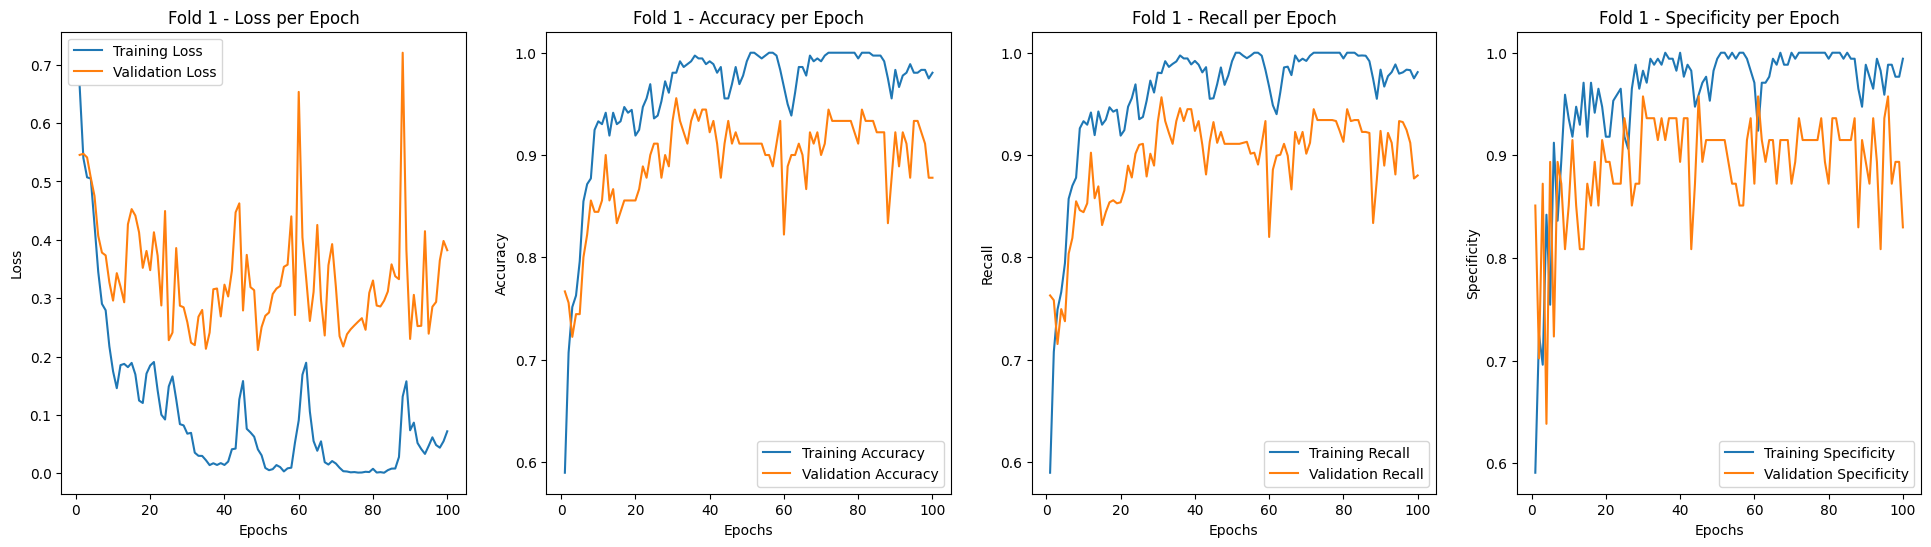

Fold 2


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.65, Accuracy: 0.66, Recall: 0.67, Specificity: 0.71, Validation Loss: 0.59, Validation Accuracy: 0.67, Validation Recall: 0.67, Validation Specificity: 0.53
Epoch 2/100, Loss: 0.53, Accuracy: 0.71, Recall: 0.71, Specificity: 0.60, Validation Loss: 0.51, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.85
Epoch 3/100, Loss: 0.47, Accuracy: 0.77, Recall: 0.77, Specificity: 0.74, Validation Loss: 0.48, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.68
Epoch 4/100, Loss: 0.46, Accuracy: 0.79, Recall: 0.79, Specificity: 0.84, Validation Loss: 0.45, Validation Accuracy: 0.82, Validation Recall: 0.82, Validation Specificity: 0.85
Epoch 5/100, Loss: 0.39, Accuracy: 0.83, Recall: 0.83, Specificity: 0.81, Validation Loss: 0.37, Validation Accuracy: 0.86, Validation Recall: 0.85, Validation Specificity: 0.91
Epoch 6/100, Loss: 0.34, Accuracy: 0.84, Recall: 0.84, Specificity: 0.88, Validation Loss: 0.37, Validation Ac

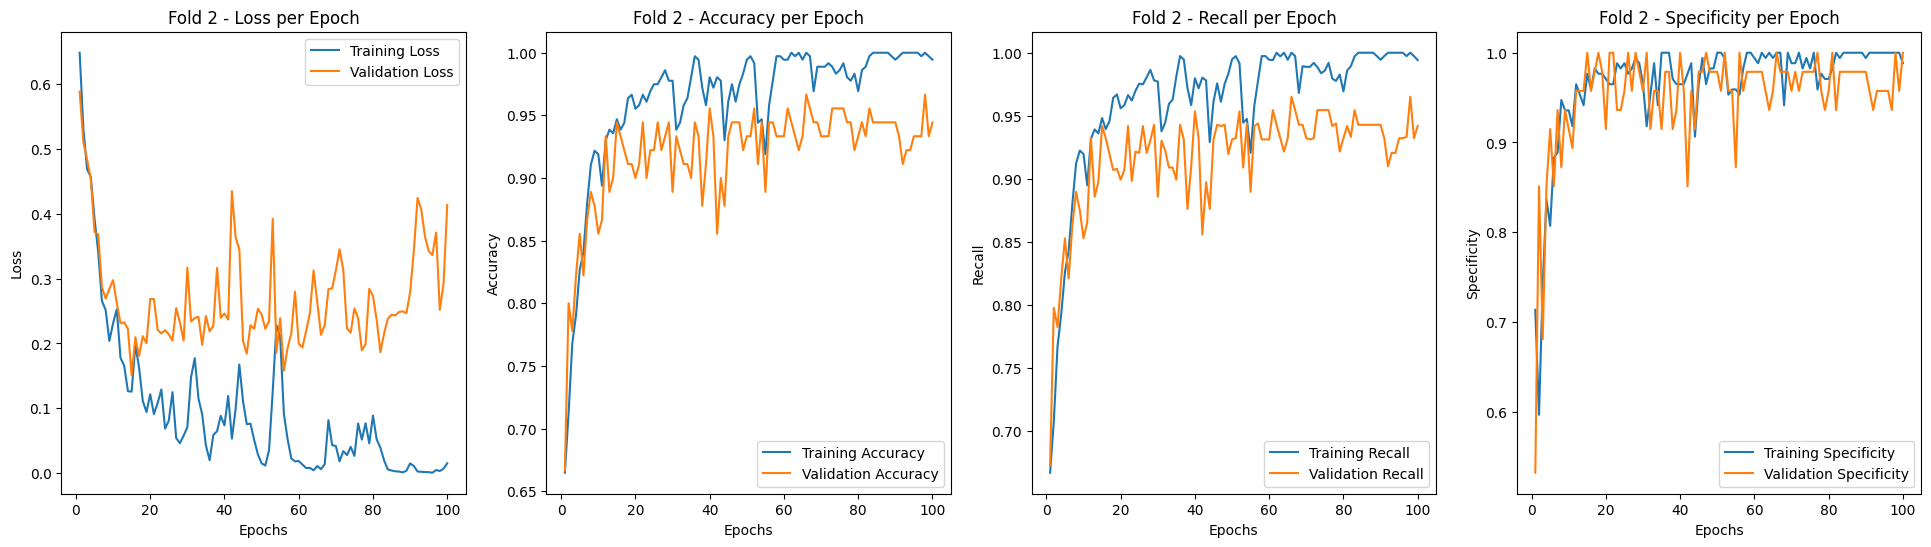

Fold 3


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.61, Accuracy: 0.64, Recall: 0.64, Specificity: 0.66, Validation Loss: 0.63, Validation Accuracy: 0.67, Validation Recall: 0.67, Validation Specificity: 0.67
Epoch 2/100, Loss: 0.51, Accuracy: 0.76, Recall: 0.76, Specificity: 0.83, Validation Loss: 0.47, Validation Accuracy: 0.74, Validation Recall: 0.75, Validation Specificity: 0.79
Epoch 3/100, Loss: 0.42, Accuracy: 0.78, Recall: 0.78, Specificity: 0.75, Validation Loss: 0.48, Validation Accuracy: 0.76, Validation Recall: 0.76, Validation Specificity: 0.90
Epoch 4/100, Loss: 0.36, Accuracy: 0.82, Recall: 0.82, Specificity: 0.81, Validation Loss: 0.43, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.83
Epoch 5/100, Loss: 0.28, Accuracy: 0.88, Recall: 0.88, Specificity: 0.90, Validation Loss: 0.42, Validation Accuracy: 0.81, Validation Recall: 0.82, Validation Specificity: 0.93
Epoch 6/100, Loss: 0.26, Accuracy: 0.90, Recall: 0.90, Specificity: 0.93, Validation Loss: 0.39, Validation Ac

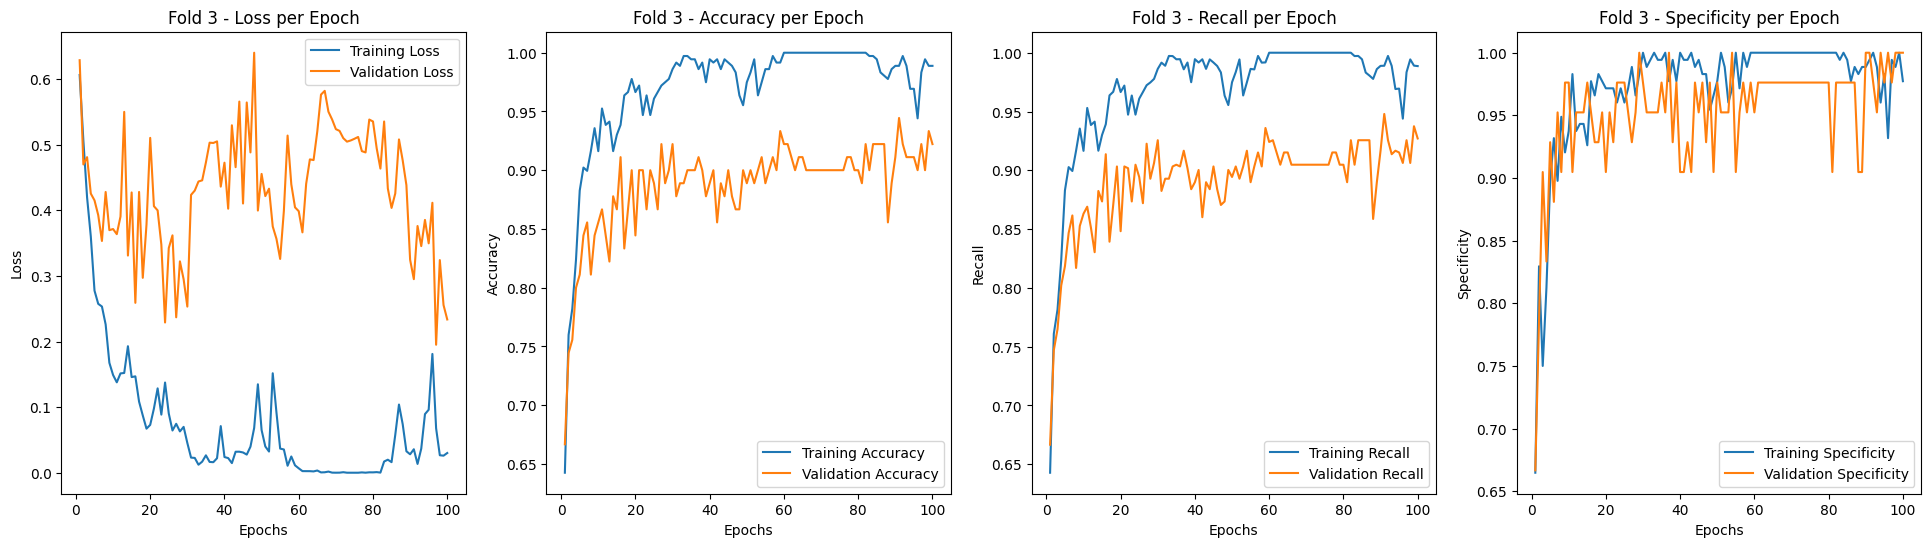

Fold 4


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.63, Accuracy: 0.64, Recall: 0.64, Specificity: 0.66, Validation Loss: 0.56, Validation Accuracy: 0.67, Validation Recall: 0.68, Validation Specificity: 0.69
Epoch 2/100, Loss: 0.50, Accuracy: 0.74, Recall: 0.74, Specificity: 0.74, Validation Loss: 0.48, Validation Accuracy: 0.80, Validation Recall: 0.80, Validation Specificity: 0.86
Epoch 3/100, Loss: 0.43, Accuracy: 0.80, Recall: 0.80, Specificity: 0.89, Validation Loss: 0.46, Validation Accuracy: 0.78, Validation Recall: 0.78, Validation Specificity: 0.79
Epoch 4/100, Loss: 0.36, Accuracy: 0.84, Recall: 0.84, Specificity: 0.84, Validation Loss: 0.50, Validation Accuracy: 0.76, Validation Recall: 0.77, Validation Specificity: 0.81
Epoch 5/100, Loss: 0.30, Accuracy: 0.86, Recall: 0.86, Specificity: 0.91, Validation Loss: 0.44, Validation Accuracy: 0.83, Validation Recall: 0.83, Validation Specificity: 0.79
Epoch 6/100, Loss: 0.25, Accuracy: 0.90, Recall: 0.90, Specificity: 0.93, Validation Loss: 0.41, Validation Ac

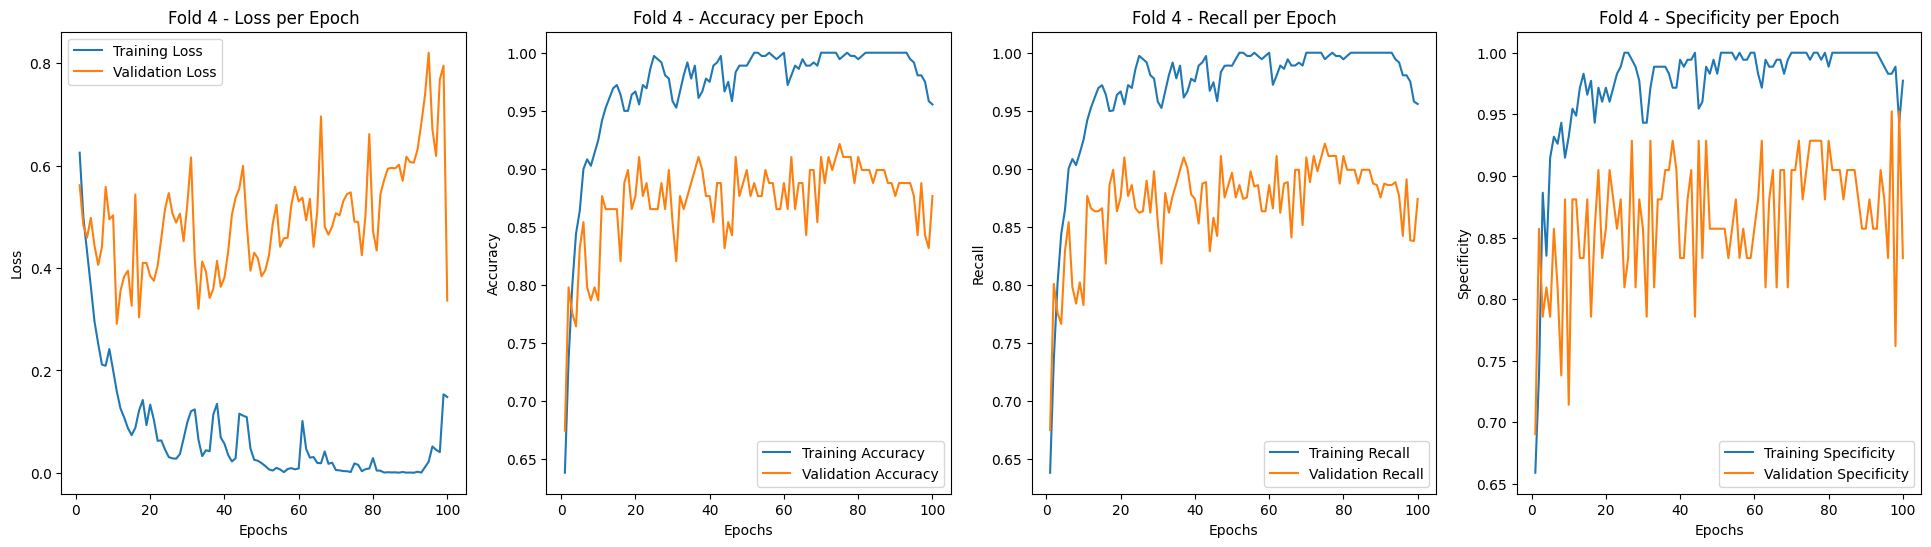

Fold 5


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Loss: 0.70, Accuracy: 0.60, Recall: 0.60, Specificity: 0.56, Validation Loss: 0.56, Validation Accuracy: 0.65, Validation Recall: 0.66, Validation Specificity: 0.72
Epoch 2/100, Loss: 0.54, Accuracy: 0.73, Recall: 0.73, Specificity: 0.85, Validation Loss: 0.52, Validation Accuracy: 0.73, Validation Recall: 0.72, Validation Specificity: 0.65
Epoch 3/100, Loss: 0.46, Accuracy: 0.78, Recall: 0.78, Specificity: 0.78, Validation Loss: 0.49, Validation Accuracy: 0.75, Validation Recall: 0.75, Validation Specificity: 0.75
Epoch 4/100, Loss: 0.41, Accuracy: 0.81, Recall: 0.81, Specificity: 0.84, Validation Loss: 0.44, Validation Accuracy: 0.76, Validation Recall: 0.76, Validation Specificity: 0.70
Epoch 5/100, Loss: 0.31, Accuracy: 0.87, Recall: 0.87, Specificity: 0.94, Validation Loss: 0.46, Validation Accuracy: 0.81, Validation Recall: 0.80, Validation Specificity: 0.72
Epoch 6/100, Loss: 0.26, Accuracy: 0.88, Recall: 0.88, Specificity: 0.88, Validation Loss: 0.40, Validation Ac

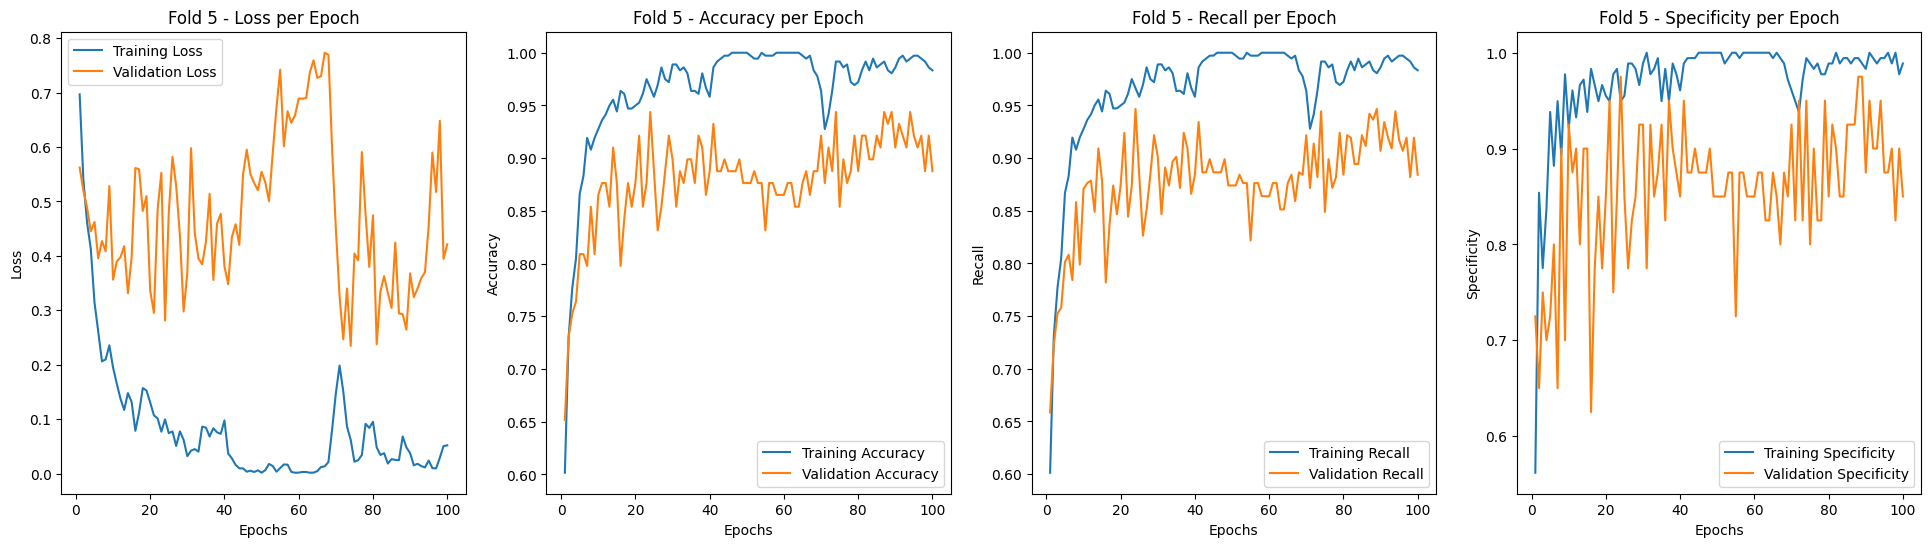

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Train Loss: 0.07 - Train Accuracy: 0.98 - Train Recall: 0.98 - Train Specificity: 0.99
           - Validation Loss: 0.38 - Validation Accuracy: 0.88 - Validation Recall: 0.88 - Validation Specificity: 0.83
------------------------------------------------------------------------
> Fold 2 - Train Loss: 0.02 - Train Accuracy: 0.99 - Train Recall: 0.99 - Train Specificity: 0.99
           - Validation Loss: 0.41 - Validation Accuracy: 0.94 - Validation Recall: 0.94 - Validation Specificity: 1.00
------------------------------------------------------------------------
> Fold 3 - Train Loss: 0.03 - Train Accuracy: 0.99 - Train Recall: 0.99 - Train Specificity: 0.98
           - Validation Loss: 0.23 - Validation Accuracy: 0.92 - Validation Recall: 0.93 - Validation Specificity: 1.00
---------------------------------------

In [202]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import os
import matplotlib.pyplot as plt

# Inisialisasi KFold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menyimpan hasil setiap fold
fold_no = 1
train_loss_per_fold = []
train_accuracy_per_fold = []
train_recall_per_fold = []
train_specificity_per_fold = []
val_loss_per_fold = []
val_accuracy_per_fold = []
val_recall_per_fold = []
val_specificity_per_fold = []

# Membuat direktori untuk menyimpan model jika belum ada
os.makedirs('tuning_multi_scale_transformer_encoder', exist_ok=True)

for train_index, val_index in kf.split(X_train_tensor):
    print(f'Fold {fold_no}')

    # Membagi data
    X_train_fold, X_val_fold = X_train_tensor[train_index], X_train_tensor[val_index]
    y_train_fold, y_val_fold = y_train_tensor[train_index], y_train_tensor[val_index]

    # Membuat TensorDataset untuk train dan validation fold
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(train_dataset_fold, batch_size=32, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=32, shuffle=False)

    # Inisialisasi model dan optimizer untuk setiap fold
    model = TransformerModel(input_dim, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Menyimpan loss, akurasi, recall, dan specificity per epoch
    train_losses = []
    train_accuracies = []
    train_recalls = []
    train_specificities = []
    val_losses = []
    val_accuracies = []
    val_recalls = []
    val_specificities = []

    # Training loop untuk fold ini
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        all_train_preds = []
        all_train_labels = []

        for X_batch, y_batch in train_loader_fold:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

            # Simpan prediksi dan label untuk perhitungan recall dan specificity
            all_train_preds.extend(predicted.cpu().numpy())
            all_train_labels.extend(y_batch.cpu().numpy())

        train_loss = running_loss / len(train_loader_fold)
        train_accuracy = correct_train / total_train
        train_recall = recall_score(all_train_labels, all_train_preds, average='macro')
        
        # Confusion matrix untuk specificity
        tn, fp, fn, tp = confusion_matrix(all_train_labels, all_train_preds).ravel()
        train_specificity = tn / (tn + fp)

        # Evaluasi pada data validasi
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        all_val_preds = []
        all_val_labels = []

        with torch.no_grad():
            for X_batch, y_batch in val_loader_fold:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()
                

                # Simpan prediksi dan label untuk perhitungan recall dan specificity
                all_val_preds.extend(predicted.cpu().numpy())
                all_val_labels.extend(y_batch.cpu().numpy())

        val_loss /= len(val_loader_fold)
        val_accuracy = correct_val / total_val
        val_recall = recall_score(all_val_labels, all_val_preds, average='macro')

        # Confusion matrix untuk specificity pada validation
        tn, fp, fn, tp = confusion_matrix(all_val_labels, all_val_preds).ravel()
        val_specificity = tn / (tn + fp)

                # Simpan hasil per epoch
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_recalls.append(train_recall)
        train_specificities.append(train_specificity)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_recalls.append(val_recall)
        val_specificities.append(val_specificity)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.2f}, Accuracy: {train_accuracy:.2f}, Recall: {train_recall:.2f}, Specificity: {train_specificity:.2f}, '
              f'Validation Loss: {val_loss:.2f}, Validation Accuracy: {val_accuracy:.2f}, Validation Recall: {val_recall:.2f}, Validation Specificity: {val_specificity:.2f}')

    train_loss_per_fold.append(train_loss)
    train_accuracy_per_fold.append(train_accuracy)
    train_recall_per_fold.append(train_recall)
    train_specificity_per_fold.append(train_specificity)
    val_loss_per_fold.append(val_loss)
    val_accuracy_per_fold.append(val_accuracy)
    val_recall_per_fold.append(val_recall)
    val_specificity_per_fold.append(val_specificity)

    # Simpan model
    model_filename = f'tuning_multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    torch.save(model.state_dict(), model_filename)
    print(f'Model for fold {fold_no} saved as {model_filename}')

    # Plot grafik loss, akurasi, recall, dan specificity
    epochs_range = range(1, num_epochs + 1)
    plt.figure(figsize=(24, 6))

    plt.subplot(1, 4, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Fold {fold_no} - Loss per Epoch')
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Fold {fold_no} - Accuracy per Epoch')
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(epochs_range, train_recalls, label='Training Recall')
    plt.plot(epochs_range, val_recalls, label='Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.title(f'Fold {fold_no} - Recall per Epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(epochs_range, train_specificities, label='Training Specificity')
    plt.plot(epochs_range, val_specificities, label='Validation Specificity')
    plt.xlabel('Epochs')
    plt.ylabel('Specificity')
    plt.title(f'Fold {fold_no} - Specificity per Epoch')
    plt.legend()

    plt.show()

    fold_no += 1

# Menampilkan hasil akhir
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(train_loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Train Loss: {train_loss_per_fold[i]:.2f} - Train Accuracy: {train_accuracy_per_fold[i]:.2f} - Train Recall: {train_recall_per_fold[i]:.2f} - Train Specificity: {train_specificity_per_fold[i]:.2f}')
    print(f'           - Validation Loss: {val_loss_per_fold[i]:.2f} - Validation Accuracy: {val_accuracy_per_fold[i]:.2f} - Validation Recall: {val_recall_per_fold[i]:.2f} - Validation Specificity: {val_specificity_per_fold[i]:.2f}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Average Train Accuracy: {np.mean(train_accuracy_per_fold):.2f} (+- {np.std(train_accuracy_per_fold):.2f})')
print(f'> Average Train Recall: {np.mean(train_recall_per_fold):.2f}')
print(f'> Average Train Specificity: {np.mean(train_specificity_per_fold):.2f}')
print(f'> Average Train Loss: {np.mean(train_loss_per_fold):.2f}')
print(f'> Average Validation Accuracy: {np.mean(val_accuracy_per_fold):.2f} (+- {np.std(val_accuracy_per_fold):.2f})')
print(f'> Average Validation Recall: {np.mean(val_recall_per_fold):.2f}')
print(f'> Average Validation Specificity: {np.mean(val_specificity_per_fold):.2f}')
print(f'> Average Validation Loss: {np.mean(val_loss_per_fold):.2f}')
print('------------------------------------------------------------------------')

In [203]:
import torch
from sklearn.metrics import classification_report

# Menampilkan classification report untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan classification report untuk fold ini
    print(f'Classification Report for Fold {fold_no}')
    print(classification_report(val_labels, val_outputs, target_names=['MI', 'Normal']))
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3424377679.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 1
              precision    recall  f1-score   support

          MI       0.93      0.83      0.88        47
      Normal       0.83      0.93      0.88        43

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90

--------------------------------------------------------------------------------
Classification Report for Fold 2
              precision    recall  f1-score   support

          MI       0.90      1.00      0.95        47
      Normal       1.00      0.88      0.94        43

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3424377679.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 3
              precision    recall  f1-score   support

          MI       0.86      1.00      0.92        42
      Normal       1.00      0.85      0.92        48

    accuracy                           0.92        90
   macro avg       0.93      0.93      0.92        90
weighted avg       0.93      0.92      0.92        90

--------------------------------------------------------------------------------
Classification Report for Fold 4
              precision    recall  f1-score   support

          MI       0.90      0.83      0.86        42
      Normal       0.86      0.91      0.89        47

    accuracy                           0.88        89
   macro avg       0.88      0.87      0.88        89
weighted avg       0.88      0.88      0.88        89

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3424377679.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Classification Report for Fold 5
              precision    recall  f1-score   support

          MI       0.89      0.85      0.87        40
      Normal       0.88      0.92      0.90        49

    accuracy                           0.89        89
   macro avg       0.89      0.88      0.89        89
weighted avg       0.89      0.89      0.89        89

--------------------------------------------------------------------------------


In [204]:
import torch
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

# Fungsi untuk menghitung sensitivitas dan spesifisitas
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()  # Ambil nilai dari confusion matrix
    sensitivity = tp / (tp + fn)  # Sensitivitas sama dengan recall untuk kelas positif (MI)
    specificity = tn / (tn + fp)  # Spesifisitas adalah true negative rate
    return sensitivity, specificity

# Menampilkan metrik untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menghitung metrik
    accuracy = accuracy_score(val_labels, val_outputs)
    precision = precision_score(val_labels, val_outputs, average='macro')
    f1 = f1_score(val_labels, val_outputs, average='macro')
    sensitivity, specificity = calculate_sensitivity_specificity(val_labels, val_outputs)

    # Menampilkan metrik untuk fold ini
    print(f'Metrics for Fold {fold_no}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'F1-Score: {f1:.4f}')
    print(f'Sensitivity (Recall for MI): {sensitivity:.4f}')
    print(f'Specificity (True Negative Rate): {specificity:.4f}')
    print('-' * 80)


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\419627132.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Metrics for Fold 1
Accuracy: 0.8778
Precision: 0.8810
F1-Score: 0.8778
Sensitivity (Recall for MI): 0.9302
Specificity (True Negative Rate): 0.8298
--------------------------------------------------------------------------------
Metrics for Fold 2
Accuracy: 0.9444
Precision: 0.9519
F1-Score: 0.9439
Sensitivity (Recall for MI): 0.8837
Specificity (True Negative Rate): 1.0000
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\419627132.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

Metrics for Fold 3
Accuracy: 0.9222
Precision: 0.9286
F1-Score: 0.9222
Sensitivity (Recall for MI): 0.8542
Specificity (True Negative Rate): 1.0000
--------------------------------------------------------------------------------
Metrics for Fold 4
Accuracy: 0.8764
Precision: 0.8787
F1-Score: 0.8754
Sensitivity (Recall for MI): 0.9149
Specificity (True Negative Rate): 0.8333
--------------------------------------------------------------------------------
Metrics for Fold 5
Accuracy: 0.8876
Precision: 0.8885
F1-Score: 0.8859
Sensitivity (Recall for MI): 0.9184
Specificity (True Negative Rate): 0.8500
--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\419627132.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lo

C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3762505994.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

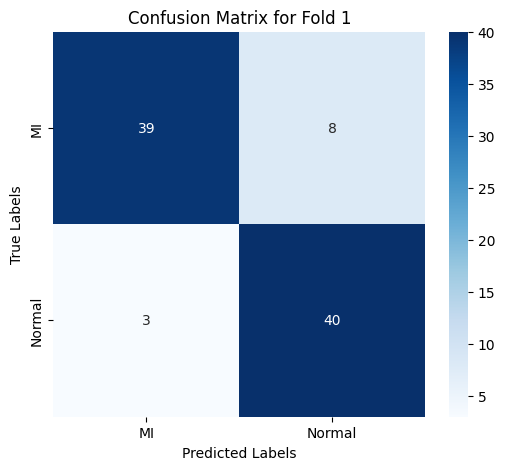

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3762505994.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

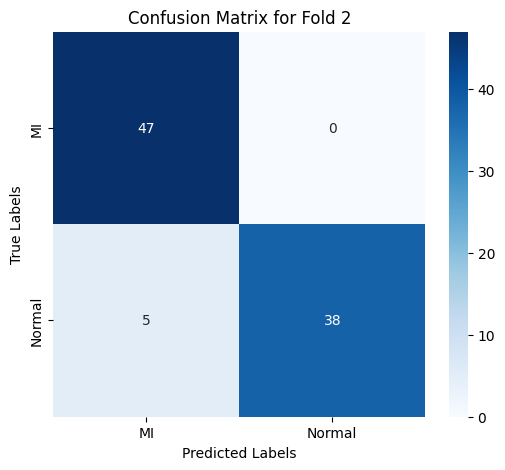

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3762505994.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

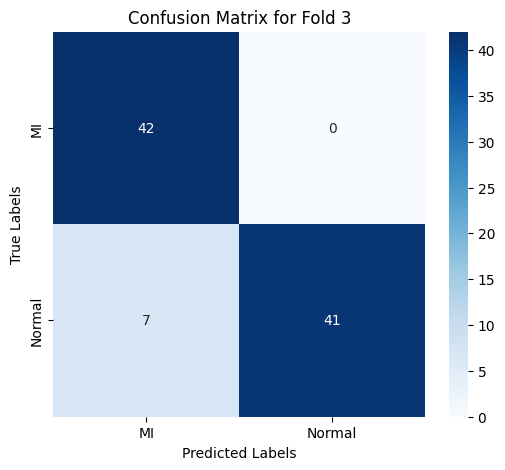

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3762505994.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

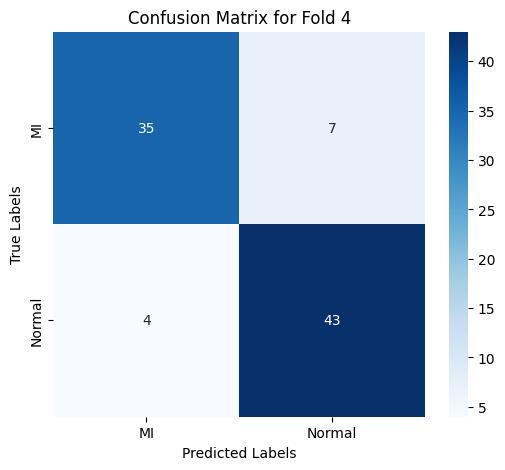

--------------------------------------------------------------------------------


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
C:\Users\asus\AppData\Local\Temp\ipykernel_21756\3762505994.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no l

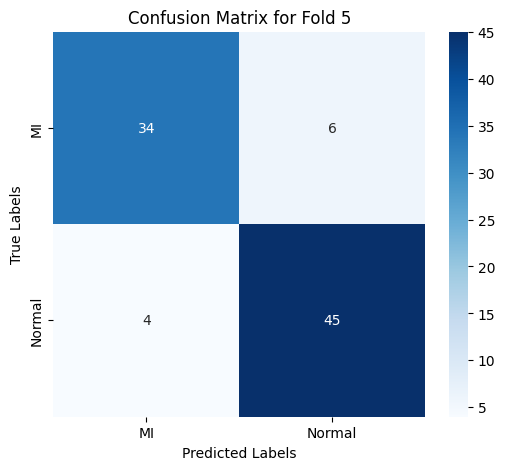

--------------------------------------------------------------------------------


In [205]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap fold
for fold_no in range(1, kf.get_n_splits() + 1):
    # Load model yang telah disimpan
    model_filename = f'tuning_multi_scale_transformer_encoder/transformer_encoder_model_fold_{fold_no}.pth'
    model = TransformerModel(input_dim, num_classes)
    model.load_state_dict(torch.load(model_filename))
    model.eval()

    # Mengambil data validasi untuk fold ini
    _, val_index = list(kf.split(X_train_tensor))[fold_no - 1]
    X_val_fold = X_train_tensor[val_index]
    y_val_fold = y_train_tensor[val_index]

    # Inference untuk data validasi
    val_outputs = []
    val_labels = []
    with torch.no_grad():
        for i in range(len(X_val_fold)):
            output = model(X_val_fold[i].unsqueeze(0))  # Tambahkan dimensi batch
            val_outputs.append(torch.argmax(output, dim=1).item())
            val_labels.append(y_val_fold[i].item())

    # Menampilkan confusion matrix untuk fold ini
    cm = confusion_matrix(val_labels, val_outputs)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['MI', 'Normal'], yticklabels=['MI', 'Normal'])
    plt.title(f'Confusion Matrix for Fold {fold_no}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('-' * 80)
